In [1]:
import pandas as pd
import os
import numpy as np 


In [9]:
import os
os.chdir('C:\\Users\\Srinivasprasanth\\Desktop\\DA\\L1 DST\\Banking_Data')
os.listdir()

['account.txt',
 'Bank.csv',
 'card.txt',
 'client.txt',
 'CTamount_loanstatus.csv',
 'CTdurationStatus.csv',
 'DatProf.xlsx',
 'Diffloanacc.csv',
 'disp.txt',
 'distance_feature_profiling.csv',
 'district.txt',
 'districtnamesAB.csv',
 'formodel.csv',
 'loan.txt',
 'loan_defaulters.pdf',
 'order.txt',
 'trans.txt',
 'worksheet_in_loan_defaulters_-_read-only (1).xlsx',
 '~$worksheet_in_loan_defaulters_-_read-only (1).xlsx']

In [34]:
clidt=pd.read_table('client.txt',header=0,sep=';')
accdt=pd.read_table('account.txt',header=0,sep=';')
dispdt=pd.read_table('disp.txt',header=0,sep=';')
loandt=pd.read_table('loan.txt',header=0,sep=';')
cardt=pd.read_table('card.txt',header=0,sep=';')
ordt=pd.read_table('order.txt',header=0,sep=';',na_values=[' ','Missing'])
transdt=pd.read_table('trans.txt',header=0,sep=';')
demo=pd.read_table('district.txt',header=0,sep=';',na_values=[' ','Missing'])
# names=['dist_id','dist_name','Reg','no_inhibitants','no_mun_in_L499','no_mun_in_500-1999',
#                         'no_mun_in_2000-9999','no_mun_in_G10000','No_of_cities','Ratio_urbaninhibitants',
#                         'Avg_Salary','Unemp_rate_1995','unemp_rate_1996','No_Entrepreneur_per_1000',
#                         'No_crimes_in_1995','No_crimes_in_1996']


C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py35\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
cldisp=pd.merge(clidt,dispdt,on='client_id',how='inner')
cldisp=cldisp.loc[:,['client_id','disp_id','account_id','type','district_id','birth_number']]
cldisp.head()
cldisp.shape
clidt.dtypes


client_id       int64
birth_number    int64
district_id     int64
dtype: object

In [16]:
#on using join on two tables Neglect this 
clidt.join(dispdt,on=['client_id'],how='inner',lsuffix='_clie',rsuffix='_disp').shape

(4708, 8)

In [77]:
cldisp.shape
accdt.shape

(4500, 4)

In [17]:
#mergin the combination of client and disposition with account data on 'account_id' column 
# cldispacc=pd.joi(accdt,cldisp,on='account_id',how='inner')
cldispacc=pd.merge(cldisp,accdt,on='account_id',how='inner',suffixes=('_client','_Account'))
cldispacc.columns
cldispacc.head()

,client_id,disp_id,account_id,type,district_id_client,birth_number,district_id_Account,frequency,date
0,1,1,1,OWNER,18,706213,18,POPLATEK MESICNE,950324
1,2,2,2,OWNER,1,450204,1,POPLATEK MESICNE,930226
2,3,3,2,DISPONENT,1,406009,1,POPLATEK MESICNE,930226
3,4,4,3,OWNER,5,561201,5,POPLATEK MESICNE,970707
4,5,5,3,DISPONENT,5,605703,5,POPLATEK MESICNE,970707


In [18]:
#Till now merged clientdispacc now merging with loan
cldispaccloan=pd.merge(cldispacc,loandt,on='account_id',how='inner',suffixes=('_account','_loan'))


In [21]:
cldispaccfilter=cldispacc[cldispacc['type']=='OWNER']

In [22]:
cldispaccfilterloan=pd.merge(cldispaccfilter,loandt,on='account_id',how='inner',suffixes=('_account','_loan'))

In [137]:
pd.merge(cldispaccloan,cardt,on='disp_id',how='inner')

(170, 18)

In [23]:
cldispaccfilterloan.head()

,client_id,disp_id,account_id,type,district_id_client,birth_number,district_id_Account,frequency,date_account,loan_id,date_loan,amount,duration,payments,status
0,2,2,2,OWNER,1,450204,1,POPLATEK MESICNE,930226,4959,940105,80952,24,3373.0,A
1,25,25,19,OWNER,21,395423,21,POPLATEK MESICNE,950407,4961,960429,30276,12,2523.0,B
2,31,31,25,OWNER,68,620209,68,POPLATEK MESICNE,960728,4962,971208,30276,12,2523.0,A
3,45,45,37,OWNER,20,520826,20,POPLATEK MESICNE,970818,4967,981014,318480,60,5308.0,D
4,46,46,38,OWNER,19,405130,19,POPLATEK TYDNE,970808,4968,980419,110736,48,2307.0,C


In [130]:
cardt.columns
# cldispaccloan.shape

Index(['card_id', 'disp_id', 'type', 'issued'], dtype='object')

In [24]:
#mergin credit card before loan 
cldispacccard=pd.merge(cldispacc,cardt,on='disp_id',how='inner',suffixes=('_account','_card'))
#merging cldispacccard and loan date
pd.merge(cldispacccard,loandt,on='account_id',how='inner',suffixes=('_account','_loan')).shape
#so we will take data of only loan without credit card 

(170, 18)

In [171]:
cldispaccloan[cldispaccloan.type=='OWNER'].shape

(682, 15)

In [25]:
cldispaccloanorder=pd.merge(cldispaccloan,ordt,on='account_id',how='inner',suffixes=('_loan','_orders'))
# to check use the below command matching with number of users who have taken the loan 
#len(cldispaccloanorder.account_id.unique())
cldispaccloanorder.head()
cldispaccloanorder.type.unique()
cldispaccloanorder

,client_id,disp_id,account_id,type,district_id_client,birth_number,district_id_Account,frequency,date_account,loan_id,date_loan,amount_loan,duration,payments,status,order_id,bank_to,account_to,amount_orders,k_symbol
0,2,2,2,OWNER,1,450204,1,POPLATEK MESICNE,930226,4959,940105,80952,24,3373.0,A,29402,ST,89597016,3372.7,UVER
1,2,2,2,OWNER,1,450204,1,POPLATEK MESICNE,930226,4959,940105,80952,24,3373.0,A,29403,QR,13943797,7266.0,SIPO
2,3,3,2,DISPONENT,1,406009,1,POPLATEK MESICNE,930226,4959,940105,80952,24,3373.0,A,29402,ST,89597016,3372.7,UVER
3,3,3,2,DISPONENT,1,406009,1,POPLATEK MESICNE,930226,4959,940105,80952,24,3373.0,A,29403,QR,13943797,7266.0,SIPO
4,25,25,19,OWNER,21,395423,21,POPLATEK MESICNE,950407,4961,960429,30276,12,2523.0,B,29423,QR,14132368,2523.2,UVER
5,31,31,25,OWNER,68,620209,68,POPLATEK MESICNE,960728,4962,971208,30276,12,2523.0,A,29431,YZ,1301700,2523.2,UVER
6,31,31,25,OWNER,68,620209,68,POPLATEK MESICNE,960728,4962,971208,30276,12,2523.0,A,29432,IJ,4896235,6817.0,SIPO
7,31,31,25,OWNER,68,620209,68,POPLATEK MESICNE,960728,4962,971208,30276,12,2523.0,A,29433,AB,79838293,1110.0,NaN
8,31,31,25,OWNER,68,620209,68,POPLATEK MESICNE,960728,4962,971208,30276,12,2523.0,A,29434,WX,52864879,164.0,POJISTNE
9,45,45,37,OWNER,20,520826,20,POPLATEK MESICNE,970818,4967,981014,318480,60,5308.0,D,29451,QR,71644407,5307.5,UVER


In [29]:
# Need to merge card, transactions and Demograph 
transdt.columns
transuver=transdt[transdt['k_symbol']=='UVER']
newdf=pd.DataFrame(transuver.groupby('account_id',as_index=False).agg({'amount':np.sum}))
# cldispaccloanorder.shape-1841,20
cldispacclonaordertransac=pd.merge(cldispaccloanorder,newdf,on='account_id',how='inner',suffixes=('_master','_tranact'))
# cldispacclonaordertransac[cldispacclonaordertransac['type']=='OWNER'
# fdf[(fdf['status'NER'][['amount','amount_loan','status']]#-only owners

fdf=cldispacclonaordertransac[(cldispacclonaordertransac['type']=='OWNER')& (cldispacclonaordertransac['k_symbol']=='UVER')]
fdf.groupby('status').size()
# fdf[(fdf['status']=='A')][['amount','amount_loan']]]=='A')& fdf['amount']<(fdf['amount_loan']-1)]
# cldispacclonaordertransac[['amount','amount_loan','status']].shape#-with desponders
# newdf.head()
# loandt.head()
# afteraddingloan=pd.merge(loandt,newdf,on='account_id',how='inner',suffixes=('_loan','_paid'))
# afteraddingloan[afteraddingloan['status']=='A'].shape
# fdf[['amount','amount_loan','status']]
fdf[['account_id','amount','amount_loan','amount_orders','payments']]
fdf.columns
fdf.isnull().sum()
pd.DataFrame.to_csv(fdf,sep=',',header=True)
fdf.to_csv('Bank.csv',header=True,index=False)
fdf.k_symbol.unique()
                          

array(['UVER'], dtype=object)

In [30]:
cldispaccloanorder.k_symbol.unique()
fdf.shape

(682, 21)

In [33]:
demo.head()

,dist_id,dist_name,Reg,no_inhibitants,no_mun_in_L499,no_mun_in_500-1999,no_mun_in_2000-9999,no_mun_in_G10000,No_of_cities,Ratio_urbaninhibitants,Avg_Salary,Unemp_rate_1995,unemp_rate_1996,No_Entrepreneur_per_1000,No_crimes_in_1995,No_crimes_in_1996
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [36]:
fdf.columns
pd.merge(fdf,demo[['A1','A11']],left_on='district_id_Account',right_on='A1',how='inner')

,client_id,disp_id,account_id,type,district_id_client,birth_number,district_id_Account,frequency,date_account,loan_id,...,payments,status,order_id,bank_to,account_to,amount_orders,k_symbol,amount,A1,A11
0,2,2,2,OWNER,1,450204,1,POPLATEK MESICNE,930226,4959,...,3373.0,A,29402,ST,89597016,3372.7,UVER,80944.8,1,12541
1,512,512,426,OWNER,60,655803,1,POPLATEK MESICNE,931129,5060,...,4201.0,D,30045,MN,45444989,4201.2,UVER,214261.2,1,12541
2,861,861,718,OWNER,1,565913,1,POPLATEK MESICNE,960303,5117,...,6412.0,A,30450,KL,3925556,6412.0,UVER,76944.0,1,12541
3,1944,1944,1603,OWNER,31,575122,1,POPLATEK MESICNE,930509,5285,...,6578.0,A,31764,CD,6821167,6578.0,UVER,78936.0,1,12541
4,2267,2267,1869,OWNER,1,665410,1,POPLATEK MESICNE,960614,5332,...,1054.0,C,32137,YZ,44563007,1054.0,UVER,11594.0,1,12541
5,2277,2277,1876,OWNER,1,790325,1,POPLATEK MESICNE,970920,5334,...,8710.0,C,32145,EF,57234233,8710.0,UVER,34840.0,1,12541
6,2316,2316,1906,OWNER,1,700325,1,POPLATEK MESICNE,960801,5343,...,1873.0,C,32190,OP,59762132,1872.8,UVER,28092.0,1,12541
7,2550,2550,2106,OWNER,1,766012,1,POPLATEK MESICNE,960201,5375,...,8460.0,A,32488,KL,14528537,8460.0,UVER,101520.0,1,12541
8,2592,2592,2143,OWNER,1,805831,1,POPLATEK MESICNE,960113,5385,...,1985.0,C,32540,OP,18297326,1985.0,UVER,55580.0,1,12541
9,2720,2720,2246,OWNER,1,495905,1,POPLATEK MESICNE,960425,5419,...,6930.0,C,32701,YZ,72096937,6930.0,UVER,159390.0,1,12541


In [445]:
cldispacclonaordertransac.columns

Index(['client_id', 'disp_id', 'account_id', 'type', 'district_id_client',
       'birth_number', 'district_id_Account', 'frequency', 'date_account',
       'loan_id', 'date_loan', 'amount_loan', 'duration', 'payments', 'status',
       'order_id', 'bank_to', 'account_to', 'amount_orders', 'k_symbol',
       'amount'],
      dtype='object')

In [263]:
#now checking the correctness of above data with the afterreadingloan shape


Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

In [324]:
cldispaccloanordertrans=pd.merge(transdt,cldispaccloanorder,how='inner',on='account_id',suffixes=('_trans','_first'))
cldispaccloanordertrans.shape


(1056320, 10)

In [287]:
cldispaccloanordertrans.loc[1]


trans_id                        1548750
account_id                         5270
date                             930114
type_trans                       PRIJEM
operation                 PREVOD Z UCTU
amount                            44749
balance                           45549
k_symbol_trans                      NaN
bank                                 IJ
account                     8.02698e+07
client_id                          6367
disp_id                            6367
type_first                        OWNER
district_id_client                   44
birth_number                     700428
district_id_Account                  44
frequency              POPLATEK MESICNE
date_account                     930113
loan_id                            6077
date_loan                        931122
amount_loan                       79608
duration                             24
payments                           3317
status                                A
order_id                          37180


In [284]:
cldispaccloanordertrans.columns

Index(['trans_id', 'account_id', 'date', 'type_first', 'operation', 'amount',
       'balance', 'k_symbol_first', 'bank', 'account', 'client_id', 'disp_id',
       'type_trans', 'district_id_client', 'birth_number',
       'district_id_Account', 'frequency', 'date_account', 'loan_id',
       'date_loan', 'amount_loan', 'duration', 'payments', 'status',
       'order_id', 'bank_to', 'account_to', 'amount_orders', 'k_symbol_trans'],
      dtype='object')

In [306]:
loanorder=pd.merge(loandt,ordt,on='account_id',how='inner',suffixes=('_loan','_order'))
loanorder.isnull().sum()

loan_id           0
account_id        0
date              0
amount_loan       0
duration          0
payments          0
status            0
order_id          0
bank_to           0
account_to        0
amount_order      0
k_symbol        276
dtype: int64

In [318]:
loanorder.groupby(['account_id','k_symbol'],as_index=False).agg({'amount_order':np.sum,
                                                                'payments':np.sum}).head()

,account_id,k_symbol,amount_order,payments
0,2,SIPO,7266.0,3373.0
1,2,UVER,3372.7,3373.0
2,19,UVER,2523.2,2523.0
3,25,POJISTNE,164.0,2523.0
4,25,SIPO,6817.0,2523.0


In [336]:
loanorder.groupby(['account_id','k_symbol']).agg({'amount_order':np.sum,'payments':np.sum}).head()

                                                                   

amount_order  payments
account_id k_symbol                        
2          SIPO            7266.0    3373.0
           UVER            3372.7    3373.0
19         UVER            2523.2    2523.0
25         POJISTNE         164.0    2523.0
           SIPO            6817.0    2523.0

In [481]:
loanorderacc=pd.merge(loanorder,accdt,how='inner',on='account_id',suffixes=('_loanorder','_account'))
loanorderaccdemo=pd.merge(loanorderacc,demo[['A1','A11']],how='inner',left_on='district_id',right_on='A1')
loanorderaccdemodisp=pd.merge(loanorderaccdemo,dispdt[['account_id','type']],on='account_id',how='inner',suffixes=('_loacd','_disp'))
# loanorderaccdemo[['A1','district_id']]
df1=loanorderaccdemodisp[loanorderaccdemodisp['type']=='OWNER'].groupby(['account_id','k_symbol'],as_index=False).agg({'amount_order':np.sum,
                                                        'payments':np.sum,
                                                        'A11':np.sum})
df1[(df1['k_symbol']=='UVER')& ((df1['amount_order']-df1['payments'])<=1)].head()
loanorderaccdemodisp.groupby('status').size()
loanorderaccdemodisp[loanorderaccdemodisp['type']=='OWNER'].groupby('account_id').agg({'amount_order':np.sum,
                                               'A11':np.sum}).head()
# loanorderaccdemodisp.sort_values(by='account_id')
# loanorderaccdemodisp[(loanorderaccdemodisp['account_id']==97) & (loanorderaccdemodisp['type']=='OWNER')][['amount_order','status']]
# loanorderaccdemodisp[(loanorderaccdemodisp['account_id']==2)]['payments']

,amount_order,A11
account_id,,
2,10638.7,25082
19,2523.2,9104
25,10614.2,39572
37,10305.5,34188
38,9666.8,33608


In [386]:
df1.columns

Index(['account_id', 'k_symbol', 'amount_order', 'payments', 'A11'], dtype='object')

In [382]:
loanorderaccdemodisp.columns

Index(['loan_id', 'account_id', 'date_loanorder', 'amount_loan', 'duration',
       'payments', 'status', 'order_id', 'bank_to', 'account_to',
       'amount_order', 'k_symbol', 'district_id', 'frequency', 'date_account',
       'A1', 'A11', 'type'],
      dtype='object')

In [370]:
loanorderaccdemo.head()

,loan_id,account_id,date_loanorder,amount_loan,duration,payments,status,order_id,bank_to,account_to,amount_order,k_symbol,district_id,frequency,date_account,A1,A11
0,5314,1787,930705,96396,12,8033.0,B,32012,EF,8468449,8033.2,UVER,30,POPLATEK TYDNE,930322,30,9650
1,6903,9337,940604,52128,24,2172.0,A,43228,CD,56037777,2172.0,UVER,30,POPLATEK MESICNE,930913,30,9650
2,5316,1801,930711,165960,36,4610.0,A,32035,OP,33671474,4610.0,UVER,46,POPLATEK MESICNE,930213,46,8369
3,5316,1801,930711,165960,36,4610.0,A,32036,QR,49547737,4167.0,SIPO,46,POPLATEK MESICNE,930213,46,8369
4,5316,1801,930711,165960,36,4610.0,A,32037,YZ,80957543,3419.0,NaN,46,POPLATEK MESICNE,930213,46,8369


In [537]:
demo.dtypes
demo.shape
loanorder.columns
demo[['A1','A11']]
loanorderaccdemo.isnull().sum()
fdf.columns
fdf.head()
pd.value_counts(fdf.k_symbol)

UVER    682
Name: k_symbol, dtype: int64

In [569]:
#for practice 
loanorderaccdemo[(loanorderaccdemo[['A11']]>9000).any(1)]['A11']
np.random.permutation(loanorderaccdemo)
loanorderaccdemo.take(np.random.permutation(5))
fdf.columns
# demo.columns

Index(['client_id', 'disp_id', 'account_id', 'type', 'district_id_client',
       'birth_number', 'district_id_Account', 'frequency', 'date_account',
       'loan_id', 'date_loan', 'amount_loan', 'duration', 'payments', 'status',
       'order_id', 'bank_to', 'account_to', 'amount_orders', 'k_symbol',
       'amount'],
      dtype='object')

In [326]:
#merging fdf with demographic data 
fdfdemo=pd.merge(fdf,demo,how='inner',left_on='district_id_client',right_on='dist_id')
fdfdemo.isnull().sum()
# da=np.array(fdfdemo.district_id_Account)
# dc=np.array(fdfdemo.district_id_client)
# np.array_equal(da,dc)
# set(dc).difference(da)
# fdf.account_id.isin(ab).sum()
#the above is for checking 


NameError: name 'fdf' is not defined

In [779]:
ordt.columns
pd.value_counts(ordt.k_symbol)
len(ordt[ordt.k_symbol=='UVER']['account_id'].unique())
a=(ordt[ordt.k_symbol=='UVER'].sort_values(by='account_id')['account_id'].unique())
b=loandt.account_id.sort_values().unique()
c=fdf.account_id.sort_values().unique()
np.array_equal(a,c)#to check similarity of two arrays which are np 
ab=(set(a).difference(b))#these are list of people who are having UVER as their k-Symbol in per order table but not available in loan data 
fdfdemo.dtypes
# type(c)
# b.ordt
# b=loandt.account_id.unique()
# c=fdf.account_id.unique()
# np.array_equal(b,c)
fdf.columns

Index(['client_id', 'disp_id', 'account_id', 'type', 'district_id_client',
       'birth_number', 'district_id_Account', 'frequency', 'date_account',
       'loan_id', 'date_loan', 'amount_loan', 'duration', 'payments', 'status',
       'order_id', 'bank_to', 'account_to', 'amount_orders', 'k_symbol',
       'amount'],
      dtype='object')

In [946]:
defaccid=fdf[fdf.status.isin(['B'])]['account_id'].unique()
amtln=fdf[fdf['account_id'].isin(defaccid)][['amount_loan','account_id']]
defaccid.shape

(31,)

In [806]:
fdf.head()

,client_id,disp_id,account_id,type,district_id_client,birth_number,district_id_Account,frequency,date_account,loan_id,...,amount_loan,duration,payments,status,order_id,bank_to,account_to,amount_orders,k_symbol,amount
0,2,2,2,OWNER,1,450204,1,POPLATEK MESICNE,930226,4959,...,80952,24,3373.0,A,29402,ST,89597016,3372.7,UVER,80944.8
4,25,25,19,OWNER,21,395423,21,POPLATEK MESICNE,950407,4961,...,30276,12,2523.0,B,29423,QR,14132368,2523.2,UVER,20185.6
5,31,31,25,OWNER,68,620209,68,POPLATEK MESICNE,960728,4962,...,30276,12,2523.0,A,29431,YZ,1301700,2523.2,UVER,30278.4
9,45,45,37,OWNER,20,520826,20,POPLATEK MESICNE,970818,4967,...,318480,60,5308.0,D,29451,QR,71644407,5307.5,UVER,5307.5
13,46,46,38,OWNER,19,405130,19,POPLATEK TYDNE,970808,4968,...,110736,48,2307.0,C,29455,QR,79067885,2306.8,UVER,18454.4


In [906]:
fdfdemo.columns

Index(['client_id', 'disp_id', 'account_id', 'type', 'district_id_client',
       'birth_number', 'district_id_Account', 'frequency', 'date_account',
       'loan_id', 'date_loan', 'amount_loan', 'duration', 'payments', 'status',
       'order_id', 'bank_to', 'account_to', 'amount_orders', 'k_symbol',
       'amount', 'dist_id', 'dist_name', 'Reg', 'no_inhibitants',
       'no_mun_in_L499', 'no_mun_in_500-1999', 'no_mun_in_2000-9999',
       'no_mun_in_G10000', 'No_of_cities', 'Ratio_urbaninhibitants',
       'Avg_Salary', 'Unemp_rate_1995', 'unemp_rate_1996',
       'No_Entrepreneur_per_1000', 'No_crimes_in_1995', 'No_crimes_in_1996'],
      dtype='object')

In [935]:
transdt[transdt.k_symbol=='UVER']['operation'].unique()
taskbro=transdt[transdt.account_id.isin(defaccid)]
x=pd.DataFrame(taskbro[taskbro.type.isin(['VYDAJ','VYBER'])].groupby('account_id',as_index=False).agg({'amount':np.sum}).rename(columns={'amount':'debitedamount'}))
y=pd.DataFrame(taskbro[taskbro.type=='PRIJEM'].groupby('account_id',as_index=False).agg({'amount':np.sum}).rename(columns={'amount':'creditedamount'}))
# y.shape

t1=pd.merge(x,y,how='inner',on='account_id')
t1['Credit-Debit']=t1.creditedamount-t1.debitedamount
fdfdemo[fdfdemo.account_id.isin(defaccid)][['account_id','Avg_Salary','payments']]
pd.merge(t1,amtln,on='account_id',how='inner').head()


# deforders=ordt[ordt.account_id.isin(defaccid)]
# t2orders=deforders.groupby(['account_id','k_symbol'],as_index=False).agg({'amount':np.sum})
# t2orders[t2orders.k_symbol=='UVER'].sort_values(by='amount',ascending=False)

,account_id,debitedamount,creditedamount,Credit-Debit,amount_loan
0,19,782321.3,793194.6,10873.3,30276
1,37,451124.7,497029.2,45904.5,318480
2,103,838364.1,876387.2,38023.1,265320
3,347,1944972.2,2000732.5,55760.3,187224
4,426,1539207.5,1568235.8,29028.3,252060


In [942]:
transdt[(transdt.account_id.isin(crctaccid))].groupby(['account_id','k_symbol']).agg({'amount':np.sum})

amount
account_id k_symbol          
2          SIPO      472290.0
           SLUZBY       949.0
           UROK       10717.5
           UVER       80944.8
25                    29970.0
           POJISTNE    4428.0
           SIPO      184059.0
           SLUZBY       379.6
           UROK        6200.1
           UVER       30278.4
38                     3003.0
           POJISTNE    2736.0
           SIPO       82812.0
           SLUZBY       360.0
           UROK        2505.3
           UVER       18454.4
67                    20470.0
           SIPO      294078.0
           SLUZBY       657.0
           UROK       10932.0
           UVER      165960.0
97                    67913.0
           POJISTNE      81.0
           SIPO       38772.0
           SLUZBY       394.2
           UROK        5440.2
           UVER      102876.0
105        SLUZBY       102.2
           UROK        2657.7
           UVER        7348.0
...                       ...
11271      SLUZBY       496.4
           UROK        3320.5
           UVER       43016.9
11317                 41760.0
           SIPO       57735.0
           SLUZBY       219.0
           UROK        4379.1
           UVER        5290.8
11327      SIPO       33237.0
           SLUZBY       131.4
           UROK        3243.2
           UVER        4896.0
11328      SLUZBY       292.0
           UROK        4942.0
           UVER       23370.0
11349      SIPO      424554.0
           SLUZBY      1140.0
           UROK        7439.2
           UVER      265924.0
11359                 11684.0
           SIPO      207828.0
           SLUZBY       671.6
           UROK        8364.2
           UVER       54027.6
11362                  6290.0
           POJISTNE   11220.0
           SIPO      162520.0
           SLUZBY       481.8
           UROK        4215.7
           UVER      129408.0

[2570 rows x 1 columns]

In [941]:
transdt.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

In [902]:
taskbro.sort_values(by='account_id').groupby(['account_id','type']).agg({'amount':np.sum})
#

amount
account_id type             
19         PRIJEM   793194.6
           VYBER     32194.0
           VYDAJ    750127.3
37         PRIJEM   497029.2
           VYBER     41655.0
           VYDAJ    409469.7
103        PRIJEM   876387.2
           VYBER    231140.0
           VYDAJ    607224.1
347        PRIJEM  2000732.5
           VYBER    522483.0
           VYDAJ   1422489.2
426        PRIJEM  1568235.8
           VYBER    109569.0
           VYDAJ   1429638.5
442        PRIJEM   429482.3
           VYDAJ    375105.8
472        PRIJEM  1410872.0
           VYBER     69205.0
           VYDAJ   1310920.8
790        PRIJEM  1899269.1
           VYBER    234963.0
           VYDAJ   1635258.4
808        PRIJEM   708994.1
           VYDAJ    678888.2
1106       PRIJEM  1772922.2
           VYBER    249807.0
           VYDAJ   1522193.9
1247       PRIJEM  2487514.4
           VYBER    464944.0
...                      ...
9052       VYDAJ   1540881.6
9138       PRIJEM   811051.9
           VYBER     26653.0
           VYDAJ    759606.8
9199       PRIJEM   519506.4
           VYBER    171460.0
           VYDAJ    339646.5
9633       PRIJEM  1334695.9
           VYBER    350649.0
           VYDAJ    977153.5
9750       PRIJEM  2208026.7
           VYBER    479514.0
           VYDAJ   1619388.3
10131      PRIJEM  1453169.7
           VYBER    420166.0
           VYDAJ   1020711.8
10266      PRIJEM  2208957.1
           VYBER    113177.0
           VYDAJ   2078655.1
10365      PRIJEM  1595917.8
           VYBER    169767.0
           VYDAJ   1370875.1
10451      PRIJEM  1129270.9
           VYDAJ   1115575.6
10857      PRIJEM   671578.5
           VYBER     61405.0
           VYDAJ    615475.4
11021      PRIJEM  2575097.5
           VYBER    311146.0
           VYDAJ   2155520.2

[216 rows x 1 columns]

In [958]:
# taking list of customer who have paid their loan and no longer have debts
crctaccid=fdf[fdf.status.isin(['A'])]['account_id']
transdt[(transdt.account_id.isin(crctaccid))& transdt.type]
crctaccid.shape
pd.value_counts(fdf.status)

C    403
A    203
D     45
B     31
Name: status, dtype: int64

In [959]:
deforders.columns
defaccid.shape

(31,)

In [548]:
# %store fdf
%store fdfdemo
# %store defaccid

# %store crctaccid
%store fdfdemoAB
%store fmcheckfin
%store fmcheckfinCD
%store fdfdemoCD
%store transdfCD

Stored 'fdfdemo' (DataFrame)
Stored 'fdfdemoAB' (DataFrame)
Stored 'fmcheckfin' (DataFrame)
Stored 'fmcheckfinCD' (DataFrame)
Stored 'fdfdemoCD' (DataFrame)
Stored 'transdfCD' (DataFrame)


In [492]:
%store fmcheckfin
%store fmcheckfinCD
%store tomerge
%store dfaccid_lstdate

Stored 'fmcheckfin' (DataFrame)
Stored 'fmcheckfinCD' (DataFrame)
Stored 'tomerge' (DataFrame)
Stored 'dfaccid_lstdate' (DataFrame)


In [1]:
%store -r fdfdemoAB
%store -r fdfdemo
%store -r fdfdemoCD
%store -r fmcheckfin
%store -r fmcheckfinCD

# fdfdemoAB.columns


In [154]:
%store -r transdfCD

In [341]:
#taking amount of debits and credtis for defaulters
# onlyBtrans=transdt[transdt.account_id.isin(defaccid)]
# onlyAtrans=transdt[transdt.account_id.isin(crctaccid)]
# # .groupby(['account_id','k_symbol']).agg({'amount':np.sum})
# # onlyAtrans.groupby(['account_id','k_symbol'],as_index=False)
# # set1=onlyBtrans[(onlyBtrans.k_symbol=='SANKC. UROK')]['account_id'].unique()
# # set2=onlyBtrans.account_id.unique()
# # set(set2).difference(set1)
# # onlyBtrans[(onlyBtrans.account_id.isin(set1)) & (onlyBtrans.k_symbol=='SANKC. UROK')][['account_id','type','k_symbol']]
# trgrp=transdt[transdt['account_id'].isin(defaccid)].groupby(['account_id','type'],as_index=False).agg({'amount':np.sum})
# trgrp.groupby(level=0).sum()
# trgrp.head()
fdfdemo.dtypes
pd.value_counts(fdfdemo.status)

C    403
A    203
D     45
B     31
Name: status, dtype: int64

In [1175]:
# trgrp[trgrp.type=='VYBER']['type']='VYDAJ'
# trgrp.loc[trgrp.type=='VYBER','type']='VYDAJ'
# trgrp.groupby(['account_id','type']).sum()
ordt[ordt.account_id.isin(defaccid)].groupby(['account_id','k_symbol']).size()
ordt[ordt.account_id.isin(crctaccid)].groupby(['account_id','k_symbol']).size()

# transdt[transdt.account_id.isin(defaccid)].groupby(['account_id','k_symbol']).size()
loanorder=pd.merge(loandt,ordt,on='account_id',how='inner',suffixes=('_loan','_ordt')).sort_values(by='account_id')
seta=loanorder[(loanorder.account_id.isin(defaccid)) & (loanorder.k_symbol=='UVER')]['amount_ordt']
setb=loanorder[(loanorder.account_id.isin(defaccid)) & (loanorder.k_symbol=='UVER')][['payments','amount_ordt']]


{1817.3,
 2454.5,
 2523.2,
 2568.8,
 2770.3,
 3016.7,
 3151.3,
 4335.8,
 4557.2,
 5700.3,
 6394.8,
 6408.8,
 7040.7,
 7281.3,
 7741.8,
 7801.2,
 7903.8,
 8022.8,
 8033.2,
 8307.8}

In [1191]:
gt=transdt[(transdt['account_id'].isin(defaccid)) & (transdt['k_symbol']!='UVER')].groupby(['account_id','k_symbol'],as_index=False).size()
notuverfordefault=gt.groupby(level=0).sum()
(notuverfordefault)
#now checking for correctly paid people 


account_id
19       170
347      124
790      128
1106     129
1527     126
1787     176
1888     148
1993      95
2176     258
3273     121
4081     125
4320      58
4462      69
5066     201
5428     199
5442     343
5927     263
6034     136
6051     186
6118     231
6400     156
6473     140
6609     159
7418     244
7824     170
8073     251
8566     299
9199      99
10131    173
10266    243
11021    195
dtype: int64

In [1194]:
transdt[(transdt['account_id'].isin(crctaccid))].groupby(['account_id','k_symbol'],as_index=False).size()
fdfdemo.dtypes

client_id                     int64
disp_id                       int64
account_id                    int64
type                         object
district_id_client            int64
birth_number                  int64
district_id_Account           int64
frequency                    object
date_account                  int64
loan_id                       int64
date_loan                     int64
amount_loan                   int64
duration                      int64
payments                    float64
status                       object
order_id                      int64
bank_to                      object
account_to                    int64
amount_orders               float64
k_symbol                     object
amount                      float64
dist_id                       int64
dist_name                    object
Reg                          object
no_inhibitants                int64
no_mun_in_L499                int64
no_mun_in_500-1999            int64
no_mun_in_2000-9999         

In [1176]:
loanorder[(loanorder.account_id.isin(defaccid)) & (loanorder.k_symbol=='UVER')][['payments','amount_ordt']]

,payments,amount_ordt
510,2523.0,2523.2
327,7801.0,7801.2
146,4336.0,4335.8
232,8023.0,8022.8
233,4557.0,4557.2
0,8033.0,8033.2
999,4780.0,4780.0
321,5700.0,5700.3
151,8308.0,8307.8
1029,7876.0,7876.0


In [1124]:
fdfdemo[fdfdemo.account_id.isin(defaccid)][['account_id','Sex','Avg_Salary','payments','duration','Unemp_rate_1995','No_crimes_in_1995','dist_name','no_inhibitants']].sort_values(by='account_id')
fdfdemo[fdfdemo.account_id.isin(defaccid)].groupby('Sex',as_index=False).size()

Sex
F    17
M    14
dtype: int64

In [1201]:
fdfdemo['Sex']=['F' if (int(str(x)[2:4])>12) else 'M' for x in fdfdemo.birth_number]
loanorder.columns
fdfdemo.birth_number
fdf.columns
fdfdemo[fdfdemo.account_id.isin(defaccid)][['account_id','amount_loan','Avg_Salary']]

,account_id,amount_loan,Avg_Salary
1,347,187224,12541
38,6118,270648,12541
75,11021,168984,12541
79,19,30276,9104
82,7418,30276,9104
92,1993,68400,9893
103,1106,192552,8547
123,6609,60156,8427
135,3273,94512,10673
146,8566,230220,10673


In [330]:
# fdfdemo[(fdfdemo.account_id.isin(crctaccid))& (fdfdemo.amount_loan>100000) ][['account_id','amount_loan','Avg_Salary']].shape
fdfdemoAB.shape

(234, 42)

In [1236]:
pd.value_counts(fdfdemo.status)
fdfdemoAB=fdfdemo[fdfdemo.status.isin(['A','B'])]
fdfdemoAB['status_con']=fdfdemoAB.status.map({'A':0,'B':1})
# fdfdemoAB.groupby(['district_id_client','status'],as_inde[x=False).size().reset_index().rename(columns=)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


status_con
district_id_client status_con            
1                  0                    0
                   1                    3
2                  0                    0
3                  0                    0
4                  1                    1
5                  0                    0
                   1                    1
6                  1                    1
7                  0                    0
9                  0                    0
10                 0                    0
11                 0                    0
                   1                    1
12                 0                    0
13                 0                    0
                   1                    1
14                 0                    0
15                 0                    0
                   1                    1
16                 0                    0
                   1                    1
17                 0                    0
18                 0                    0
19                 0                    0
20                 1                    1
21                 0                    0
                   1                    2
23                 0                    0
24                 0                    0
                   1                    2
...                                   ...
56                 0                    0
                   1                    1
57                 0                    0
59                 0                    0
60                 0                    0
                   1                    1
61                 0                    0
                   1                    1
62                 0                    0
63                 0                    0
64                 0                    0
65                 0                    0
66                 0                    0
67                 0                    0
                   1                    1
68                 0                    0
                   1                    1
69                 0                    0
70                 0                    0
71                 0                    0
72                 0                    0
                   1                    1
73                 0                    0
                   1                    1
74                 0                    0
                   1                    2
75                 0                    0
76                 0                    0
77                 0                    0
                   1                    1

[92 rows x 1 columns]

In [1242]:
fdfdemoAB.groupby(['district_id_client','status_con']).size().reset_index()

,district_id_client,status_con,0
0,1,0,29
1,1,1,3
2,2,0,1
3,3,0,2
4,4,1,1
5,5,0,3
6,5,1,1
7,6,1,1
8,7,0,1
9,9,0,5


In [1296]:
A=pd.crosstab(fdfdemoAB['district_id_client'],fdfdemoAB['status_con']).reset_index()
B=fdfdemoAB[['district_id_client','dist_name']]
B=B.drop_duplicates()
districtnamesAB=pd.merge(A,B,on='district_id_client',how='inner')
districtnamesAB.to_csv('districtnamesAB.csv')

In [1289]:
fdfdemoAB.to_csv('distance_feature_profiling.csv')


In [1245]:
fdfdemoAB.columns

Index(['client_id', 'disp_id', 'account_id', 'type', 'district_id_client',
       'birth_number', 'district_id_Account', 'frequency', 'date_account',
       'loan_id', 'date_loan', 'amount_loan', 'duration', 'payments', 'status',
       'order_id', 'bank_to', 'account_to', 'amount_orders', 'k_symbol',
       'amount', 'dist_id', 'dist_name', 'Reg', 'no_inhibitants',
       'no_mun_in_L499', 'no_mun_in_500-1999', 'no_mun_in_2000-9999',
       'no_mun_in_G10000', 'No_of_cities', 'Ratio_urbaninhibitants',
       'Avg_Salary', 'Unemp_rate_1995', 'unemp_rate_1996',
       'No_Entrepreneur_per_1000', 'No_crimes_in_1995', 'No_crimes_in_1996',
       'Sex', 'status_con'],
      dtype='object')

In [332]:
fdfdemoAB.shape
pd.value_counts(fdfdemoAB.status)
fdfdemoAB.account_id.unique()
fdfdemoAB.dtypes


client_id                             int64
disp_id                               int64
account_id                            int64
type                                 object
district_id_client                    int64
birth_number                          int64
district_id_Account                   int64
frequency                            object
date_account                 datetime64[ns]
loan_id                               int64
date_loan                    datetime64[ns]
amount_loan                           int64
duration                              int64
payments                            float64
status                               object
order_id                              int64
bank_to                              object
account_to                            int64
amount_orders                       float64
k_symbol                             object
amount                              float64
dist_id                               int64
dist_name                       

In [1381]:
fdfdemoAB[['date_account','date_loan']]
# DT=fdfdemoAB.date_account.astype(np.datetime64)
# pd.to_datetime(fdfdemoAB.date_account,format='%Y%m%d')
# fdfdemoAB[['date_account','date_loan']]
# fdfdemoAB.dtypes
# pd.datetime.strptime(str(fdfdemoAB.date_account),'%y%m%d')
# fdfdemoAB.date_account=[pd.datetime.strptime(str(x),'%y%m%d') for x in fdfdemoAB.date_account]
# fdfdemoAB.date_loan=[pd.datetime.strptime(str(x),'%y%m%d') for x in fdfdemoAB.date_loan]

fdfdemoAB['ACLOANGAP']=fdfdemoAB['date_loan']-fdfdemoAB['date_account']

TW=(pd.crosstab(fdfdemoAB['ACLOANGAP'],fdfdemoAB['status_con'])).reset_index()

# TW.to_csv('Diffloanacc.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [333]:
fdfdemoAB.ACLOANGAP

0     313 days
1     504 days
2     535 days
7     541 days
8     245 days
12    317 days
16    570 days
17    667 days
22    246 days
23    128 days
27    476 days
31    415 days
33    391 days
35    173 days
36    528 days
38    307 days
39    553 days
40    228 days
43    310 days
46    313 days
47    568 days
49    319 days
57    171 days
60    496 days
63    669 days
65    202 days
67    117 days
68    476 days
74    425 days
75    571 days
        ...   
600   242 days
603   127 days
605   204 days
608   364 days
610   632 days
611   347 days
613   315 days
616   183 days
618   198 days
620   422 days
623   448 days
629   383 days
630   257 days
633   482 days
640   367 days
642   450 days
646   672 days
651   382 days
653   363 days
655   576 days
656   675 days
657   531 days
660   135 days
662   365 days
664   447 days
665   142 days
667   671 days
673   532 days
674   231 days
676   496 days
Name: ACLOANGAP, Length: 234, dtype: timedelta64[ns]

In [12]:
# pd.crosstab(fdfdemoAB.amount_loan,fdfdemoAB.status_con).reset_index().sort_values(by='amount_loan').to_csv('CTamount_loanstatus.csv')
pd.crosstab(fdfdemoAB.amount_loan.quantile(q=np.arange(0,1,0.25).tolist()),fdfdemoAB.status_con).reset_index()

# fdfdemoAB.groupby([fdfdemoAB.amount_loan.quantile(np.arange(0,1,0.25).tolist()),fdfdemoAB.status_con]).agg('sum')

# fdfdemoAB


pd.crosstab(pd.qcut(fdfdemoAB.amount_loan,4),fdfdemoAB.status_con)
min(fdfdemoAB.amount_loan)#4980
# max(fdfdemoAB.amount_loan)#464520

4980

In [544]:
decAmount_loan=pd.crosstab(pd.qcut(fdfdemoAB.amount_loan,5),fdfdemoAB.status_con).reset_index()
decAmount_loan['Perc_1']=decAmount_loan[1]/(decAmount_loan[0]+decAmount_loan[1])
decAmount_loan

status_con,amount_loan,0,1,Perc_1
0,"(4979.999, 38822.4]",44,3,0.063830
1,"(38822.4, 68707.2]",40,7,0.148936
2,"(68707.2, 92860.8]",42,4,0.086957
3,"(92860.8, 152702.4]",44,3,0.063830
4,"(152702.4, 464520.0]",33,14,0.297872


In [201]:
#transforming the amount_loan variable 
famt_loan=pd.qcut(fdfdemoAB.amount_loan,5)
famt_loan=famt_loan.astype(np.chararray)
# np.where(famt_loan.astype(np.chararray)=='(101972.0, 464520.0]',1,famt_loan.astype(np.chararray))
x=famt_loan.astype(np.chararray)
x=np.where(x.astype(np.str_)=='(4979.999, 38822.4]','0.063830',x.astype(np.str_))
x=np.where(x.astype(np.str_)=='(38822.4, 68707.2]','0.148936',x.astype(np.str_))
x=np.where(x.astype(np.str_)=='(68707.2, 92860.8]','0.086957',x.astype(np.str_))
x=np.where(x.astype(np.str_)=='(92860.8, 152702.4]','0.063830',x.astype(np.str_))
x=np.where(x.astype(np.str_)=='(152702.4, 464520.0]','0.297872',x.astype(np.str_))
pd.value_counts(x)

0.063830    94
0.148936    47
0.297872    47
0.086957    46
dtype: int64

In [399]:
CT_Duration=pd.crosstab(fdfdemoAB.duration,fdfdemoAB.status_con).reset_index()
CT_Duration['_Perc']=CT_Duration[1]/(CT_Duration[0]+CT_Duration[1])
CT_Duration
#as the  duration increases no of A's and B's decreases 
# fdfdemoAB.dtypes
# DecSal=pd.crosstab(pd.qcut(fdfdemoAB.Avg_Salary,4),fdfdemoAB.status_con).reset_index()
# DecSal['Perc']=DecSal[1]/(DecSal[0]+DecSal[1])
# DecSal
# writer=pd.ExcelWriter('DatProf.xlsx')
# DecSal.index = DecSal.index.astype(str)
# DecSal.dtypes.astype(str).to_excel(writer,sheet_name='Sheet1')
# writer.save()

status_con,duration,0,1,_Perc
0,12,93,10,0.097087
1,24,64,11,0.146667
2,36,32,7,0.179487
3,48,11,2,0.153846
4,60,3,1,0.250000


In [22]:
#region
CTREgion=pd.crosstab(fdfdemoAB.Reg,fdfdemoAB.status_con)
CTREgion['Perc_Def']=CTREgion[1]/(CTREgion[0]+CTREgion[1])
CTREgion

status_con,0,1,Perc_Def
Reg,,,
Prague,29,3,0.093750
central Bohemia,24,5,0.172414
east Bohemia,21,0,0.000000
north Bohemia,21,1,0.045455
north Moravia,35,7,0.166667
south Bohemia,19,5,0.208333
south Moravia,37,5,0.119048
west Bohemia,17,5,0.227273


In [19]:
#amount_orders
CTAmount_orders=pd.crosstab(pd.qcut(fdfdemoAB.amount_orders,4),fdfdemoAB.status_con)
CTAmount_orders['Perc_Default']=CTAmount_orders[1]/(CTAmount_orders[0]+CTAmount_orders[1])
CTAmount_orders




status_con,0,1,Perc_Default
amount_orders,,,
"(318.999, 2583.875]",53,6,0.101695
"(2583.875, 4099.55]",55,3,0.051724
"(4099.55, 6337.775]",50,8,0.137931
"(6337.775, 9736.0]",45,14,0.237288


In [20]:
#no of inhibitants 
fdfdemoAB.loc[1,]
fdfdemoAB.No_of_cities.unique().shape
pd.crosstab(fdfdemoAB.no_inhibitants,fdfdemoAB.status_con).reset_index()
CTno_inhi=pd.crosstab(pd.qcut(fdfdemoAB.no_inhibitants,4),fdfdemoAB.status_con)
CTno_inhi['Perc_Default']=CTno_inhi[1]/(CTno_inhi[0]+CTno_inhi[1])
CTno_inhi

status_con,0,1,Perc_Default
no_inhibitants,,,
"(42820.999, 86513.0]",53,7,0.116667
"(86513.0, 122603.0]",48,11,0.186441
"(122603.0, 228848.0]",54,6,0.100000
"(228848.0, 1204953.0]",48,7,0.127273


In [21]:
CTNo_cities=pd.crosstab(fdfdemoAB.No_of_cities,fdfdemoAB.status_con).reset_index()
# CTno_inhi=pd.crosstab(pd.qcut(fdfdemoAB.no_inhibitants,4),fdfdemoAB.status_con)
CTNo_cities['Perc_Default']=CTNo_cities[1]/(CTNo_cities[0]+CTNo_cities[1])
# CTno_inhi
CTNo_cities

status_con,No_of_cities,0,1,Perc_Default
0,1,39,7,0.152174
1,2,4,1,0.200000
2,3,4,0,0.000000
3,4,26,8,0.235294
4,5,24,1,0.040000
5,6,29,5,0.147059
6,7,31,4,0.114286
7,8,14,4,0.222222
8,9,13,0,0.000000
9,10,15,1,0.062500


In [1492]:
pd.crosstab(fdfdemoAB.no_mun_in_L499,fdfdemoAB.status_con).reset_index()
pd.qcut(fdfdemoAB.no_mun_in_L499,4)


0      (-0.001, 5.75]
1      (-0.001, 5.75]
2      (-0.001, 5.75]
7      (-0.001, 5.75]
8      (-0.001, 5.75]
12     (-0.001, 5.75]
16     (-0.001, 5.75]
17     (-0.001, 5.75]
22     (-0.001, 5.75]
23     (-0.001, 5.75]
27     (-0.001, 5.75]
31     (-0.001, 5.75]
33     (-0.001, 5.75]
35     (-0.001, 5.75]
36     (-0.001, 5.75]
38     (-0.001, 5.75]
39     (-0.001, 5.75]
40     (-0.001, 5.75]
43     (-0.001, 5.75]
46     (-0.001, 5.75]
47     (-0.001, 5.75]
49     (-0.001, 5.75]
57     (-0.001, 5.75]
60     (-0.001, 5.75]
63     (-0.001, 5.75]
65     (-0.001, 5.75]
67     (-0.001, 5.75]
68     (-0.001, 5.75]
74     (-0.001, 5.75]
75     (-0.001, 5.75]
            ...      
600      (34.0, 61.0]
603      (34.0, 61.0]
605      (34.0, 61.0]
608      (5.75, 34.0]
610      (5.75, 34.0]
611      (5.75, 34.0]
613      (5.75, 34.0]
616      (34.0, 61.0]
618      (34.0, 61.0]
620      (34.0, 61.0]
623      (34.0, 61.0]
629      (5.75, 34.0]
630      (5.75, 34.0]
633      (5.75, 34.0]
640      (

In [1495]:
# fdfdemoAB.shape
pd.value_counts(fdfdemoAB.status)

A    203
B     31
Name: status, dtype: int64

In [194]:
#transforming the amount_loan variable 
famt_loan=pd.qcut(fdfdemoAB.amount_loan,3)
famt_loan=famt_loan.astype(np.chararray)
# np.where(famt_loan.astype(np.chararray)=='(101972.0, 464520.0]',1,famt_loan.astype(np.chararray))
x=famt_loan.astype(np.chararray)
x=np.where(x.astype(np.str_)=='(58960.0, 101972.0]','0.128205',x.astype(np.str_))
x=np.where(x.astype(np.str_)=='(4979.999, 58960.0]','0.076923',x.astype(np.str_))
x=np.where(x.astype(np.str_)=='(101972.0, 464520.0]','0.192308',x.astype(np.str_))
pd.Series(x).value_counts()
# x1=np.where(fdfdemoAB.duration==12,0.097087,fdfdemoAB.duration)
# x1=np.where(fdfdemoAB.duration==24,0.146667,x1)
# #Duration
# x1=np.where(fdfdemoAB.duration==36,0.179487,x1)
# x1=np.where(fdfdemoAB.duration==48,0.153846,x1)
# x1=np.where(fdfdemoAB.

0.128205    78
0.076923    78
0.192308    78
dtype: int64

In [195]:
#Duration
x1=np.where(fdfdemoAB.duration==12,0.097087,fdfdemoAB.duration)
x1=np.where(fdfdemoAB.duration==24,0.146667,x1)
x1=np.where(fdfdemoAB.duration==36,0.179487,x1)
x1=np.where(fdfdemoAB.duration==48,0.153846,x1)
x1=np.where(fdfdemoAB.duration==60,0.250000,x1)
pd.Series(x1).unique()

array([0.146667, 0.097087, 0.179487, 0.153846, 0.25    ])

In [398]:
#Avg_Salary
# DecSal
DecSal=pd.crosstab(pd.qcut(fdfdemoAB.Avg_Salary,4),fdfdemoAB.status_con).reset_index()
DecSal['Perc']=DecSal[1]/(DecSal[0]+DecSal[1])
DecSal
# fdecsal=pd.qcut(fdfdemoAB.Avg_Salary,4).astype(np.chararray)
# x2=np.where(fdecsal.astype(np.str_)=='(10013.75, 12541.0]',0.101695,fdecsal.astype(np.str_))
# x2=np.where(fdecsal.astype(np.str_)=='(8994.0, 10013.75]',0.181818,x2)
# x2=np.where(fdecsal.astype(np.str_)=='(8109.999, 8598.0]',0.098361,x2)
# x2=np.where(fdecsal.astype(np.str_)=='(8598.0, 8994.0]',0.152542,x2)
# pd.Series(x2).unique()
# pd.value_counts(pd.Series(x2))

status_con,Avg_Salary,0,1,Perc
0,"(8109.999, 8598.0]",55,6,0.098361
1,"(8598.0, 8994.0]",50,9,0.152542
2,"(8994.0, 10013.75]",45,10,0.181818
3,"(10013.75, 12541.0]",53,6,0.101695


In [392]:
#amt_orders
CTAmount_orders=pd.crosstab(pd.qcut(fdfdemoAB.amount_orders,4),fdfdemoAB.status_con)
CTAmount_orders['Perc_Default']=CTAmount_orders[1]/(CTAmount_orders[0]+CTAmount_orders[1])
CTAmount_orders
# famtord=pd.qcut(fdfdemoAB.amount_orders,4).astype(np.chararray)
# famtord.astype(np.str_).unique()
# x3=np.where(famtord.astype(np.str_)=='(2583.875, 4099.55]',0.051724,famtord.astype(np.str_))
# x3=np.where(famtord.astype(np.str_)=='(6337.775, 9736.0]',0.237288,x3)
# x3=np.where(famtord.astype(np.str_)=='(4099.55, 6337.775]',0.137931,x3)
# x3=np.where(famtord.astype(np.str_)=='(318.999, 2583.875]',0.101695,x3)
# pd.Series(x3).unique()
# pd.value_counts(pd.Series(x3))

status_con,0,1,Perc_Default
amount_orders,,,
"(318.999, 2583.875]",53,6,0.101695
"(2583.875, 4099.55]",55,3,0.051724
"(4099.55, 6337.775]",50,8,0.137931
"(6337.775, 9736.0]",45,14,0.237288


In [198]:
x4=np.where(fdfdemoAB.Reg=='Prague',0.093750,fdfdemoAB.Reg)
x4=np.where(fdfdemoAB.Reg=='central Bohemia',0.172414,x4)
x4=np.where(fdfdemoAB.Reg=='east Bohemia',0.000000,x4)
x4=np.where(fdfdemoAB.Reg=='north Bohemia',0.045455,x4)
x4=np.where(fdfdemoAB.Reg=='north Moravia',0.166667,x4)
x4=np.where(fdfdemoAB.Reg=='south Bohemia',0.208333,x4)
x4=np.where(fdfdemoAB.Reg=='south Moravia',0.119048,x4)
x4=np.where(fdfdemoAB.Reg=='west Bohemia',0.227273,x4)
pd.Series(x4).unique()
pd.value_counts(pd.Series(x4))

0.119048    42
0.166667    42
0.093750    32
0.172414    29
0.208333    24
0.227273    22
0.045455    22
0.000000    21
dtype: int64

In [202]:
finbhi=pd.qcut(fdfdemoAB.no_inhibitants,4).astype(np.chararray)
finbhi.astype(np.str_).unique()
x5=np.where(finbhi.astype(np.str_)=='(228848.0, 1204953.0]',0.127273,finbhi.astype(np.str_))
x5=np.where(finbhi.astype(np.str_)=='(86513.0, 122603.0]',0.186441,x5)
x5=np.where(finbhi.astype(np.str_)=='(122603.0, 228848.0]',0.100000,x5)
x5=np.where(finbhi.astype(np.str_)=='(42820.999, 86513.0]',0.116667,x5)
pd.Series(x5).unique()
pd.value_counts(pd.Series(x5))
# fdfdemoAB.status.to_xarray
# xx=pd.Series(x,index=np.arange(x.shape[0]))
# np.column_stack(x)
fmcheck=pd.DataFrame({'amt_loan':x,'dur':x1,'avg_sal':x2,'amt_ord':x3,'reg':x4,'no_inhi':x5,'status':fdfdemoAB.status_con,
             'account_id':fdfdemoAB.account_id})


In [207]:
fmcheck=fmcheck.sort_values(by='account_id')
fmcheck.head()
fmcheck=pd.merge(fmcheck,g2[['diff','account_id']],on='account_id',how='inner')
fmcheck.head()

,account_id,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status,diff
0,2,0.086957,0.051724,0.101695,0.146667,0.127273,0.09375,0,1
1,19,0.063830,0.101695,0.181818,0.097087,0.186441,0.208333,1,5
2,25,0.063830,0.101695,0.181818,0.097087,0.1,0.166667,0,1
3,67,0.297872,0.237288,0.098361,0.146667,0.186441,0.208333,0,1
4,97,0.063830,0.237288,0.101695,0.097087,0.127273,0.166667,0,1


In [335]:
fmcheck(for reference do not remvoe this )

,account_id,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status,durdiff,diff
0,2,0.086957,0.051724,0.101695,0.146667,0.127273,0.09375,0,0,1
1,19,0.063830,0.101695,0.181818,0.097087,0.186441,0.208333,1,4,5
2,25,0.063830,0.101695,0.181818,0.097087,0.1,0.166667,0,0,1
3,67,0.297872,0.237288,0.098361,0.146667,0.186441,0.208333,0,0,1
4,97,0.063830,0.237288,0.101695,0.097087,0.127273,0.166667,0,0,1
5,132,0.086957,0.237288,0.181818,0.097087,0.1,0.045455,0,0,1
6,173,0.063830,0.237288,0.098361,0.097087,0.1,0.119048,0,0,1
7,176,0.063830,0.101695,0.152542,0.097087,0.1,0.166667,0,0,1
8,290,0.063830,0.101695,0.152542,0.153846,0.1,0.119048,0,0,0
9,347,0.297872,0.237288,0.101695,0.146667,0.127273,0.09375,1,2,2


In [157]:
decAmount_loan

status_con,amount_loan,0,1,Perc_1
0,"(4979.999, 58960.0]",72,6,0.076923
1,"(58960.0, 101972.0]",68,10,0.128205
2,"(101972.0, 464520.0]",63,15,0.192308


In [160]:
# pd.value_counts(finbhi)
# pd.DataFrame(pd.Series(x,x1),index=np.arange(x.shape[0]))

# ,'avg_sal','amt_ord','reg','no_inhi','status'
fdfdemoAB[['duration','status_con']]


,duration,status_con
0,24,0
1,24,1
2,12,0
7,36,0
8,12,0
12,12,0
16,12,0
17,12,0
22,12,0
23,12,0


In [341]:
import sklearn.linear_model as linear_model
log1=linear_model.LogisticRegression()
log1=log1.fit(Xm1train,Ym1train)
log1.predict_proba(Xm1test)
#using confusion matrix to predit the accuray 
import sklearn.metrics as metrics
metrics.confusion_matrix(Ym1test,log1.predict(Xm1test))
# print(metrics.classification_report(Ym1test,log1.predict(Xm1test)))

array([[105,   0],
       [ 17,   0]], dtype=int64)

In [458]:
import sklearn.model_selection as model_selection
fmgrid=model_selection.GridSearchCV(fm2,param_grid={'penalty':['l1'],'C':np.arange(1,120,2)})
fmgrid=fmgrid.fit(X_train,Y_train)
fmgrid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [418]:
#performing logistic regression 
fm1=linear_model.LogisticRegression()
fm1=fm1.fit(X_train,Y_train)

In [460]:
fm1.predict(X_test)
print(metrics.classification_report(Y_test,fm1.predict(X_test)))


             precision    recall  f1-score   support

          0       0.87      1.00      0.93        41
          1       0.00      0.00      0.00         6

avg / total       0.76      0.87      0.81        47



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [539]:
import sklearn.ensemble as ensemble
clf=ensemble.RandomForestClassifier()
clf.fit(TrainABX,TrainABY)
pred=clf.predict(TestABX)
pred
metrics.confusion_matrix(TestABY,pred)
# print(metrics.classification_report(TestABY,pred))
# clf.feature_importances_


array([[42,  0],
       [16,  0]], dtype=int64)

In [755]:
#building model 
s1m1=ensemble.RandomForestClassifier()
s1m1.fit(s1_m1_X,s1_m1_Y)
s1m1.predict(s1_t1_test_X)


,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status
0,0.128205,0.051724,0.101695,0.146667,0.127273,0.09375,0
1,0.192308,0.237288,0.101695,0.146667,0.127273,0.09375,1
2,0.128205,0.237288,0.101695,0.097087,0.127273,0.09375,0
7,0.192308,0.137931,0.101695,0.179487,0.127273,0.09375,0
8,0.128205,0.237288,0.101695,0.097087,0.127273,0.09375,0
12,0.076923,0.101695,0.101695,0.097087,0.127273,0.09375,0
16,0.076923,0.051724,0.101695,0.097087,0.127273,0.09375,0
17,0.076923,0.101695,0.101695,0.097087,0.127273,0.09375,0
22,0.128205,0.237288,0.101695,0.097087,0.127273,0.09375,0
23,0.076923,0.101695,0.101695,0.097087,0.127273,0.09375,0


In [809]:
!pip install imbalanced-learn

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [471]:
fmcheckfin.head()

,account_id,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status,diff,ratio_emi_Sal,durdiff,diff_lst
0,2,0.086957,0.051724,0.101695,0.146667,0.127273,0.09375,0,1,0.12069,0,0.0
1,19,0.063830,0.101695,0.181818,0.097087,0.186441,0.208333,1,5,0.12069,4,4.0
2,25,0.063830,0.101695,0.181818,0.097087,0.1,0.166667,0,1,0.033898,0,0.0
3,67,0.297872,0.237288,0.098361,0.146667,0.186441,0.208333,0,1,0.152542,0,0.0
4,97,0.063830,0.237288,0.101695,0.097087,0.127273,0.166667,0,1,0.152542,0,0.0


In [472]:
##### fm=pd.read_csv('formodel.csv',header=0).drop('Unnamed: 0',axis=1)
# fm=fm[['amt_loan','avg_sal','dur','status']]
#fmdum=pd.get_dummies(fm)
# fmdum=fm.copy()
import sklearn.model_selection as model_selection
fmdum=fmcheckfin.drop(['account_id','durdiff','no_inhi','reg','ratio_emi_Sal','diff'],axis=1)
fmdumX=fmdum.drop('status',axis=1)
fmdumY=fmdum.status

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(fmdumX,fmdumY,test_size=0.3,random_state=200)
# X_train=fmdumX
# Y_train=fmdumY

X_train

,amt_loan,amt_ord,avg_sal,dur,diff_lst
13,0.297872,0.137931,0.181818,0.153846,7.0
86,0.063830,0.137931,0.101695,0.146667,0.0
138,0.297872,0.237288,0.098361,0.179487,0.0
104,0.063830,0.101695,0.101695,0.146667,0.0
21,0.086957,0.101695,0.152542,0.179487,0.0
53,0.148936,0.051724,0.181818,0.097087,0.0
57,0.063830,0.101695,0.098361,0.097087,0.0
10,0.086957,0.051724,0.181818,0.146667,0.0
127,0.063830,0.101695,0.101695,0.097087,0.0
34,0.086957,0.237288,0.101695,0.097087,0.0


In [459]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE()
# sm_x,sm_y = sm.fit_sample(X_train,Y_train)
fmcheckfin.columns
fmcheckfin.amt_loan.value_counts()

0.063830    94
0.148936    47
0.297872    47
0.086957    46
Name: amt_loan, dtype: int64

In [473]:

import sklearn.ensemble as ensemble
import sklearn.metrics as metrics
clf=ensemble.GradientBoostingClassifier()

clf.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [474]:
clf.score(X_train,Y_train)

1.0

In [475]:
print(pd.Series(clf.predict(X_test)).value_counts())
print(metrics.confusion_matrix(Y_test,clf.predict(X_test)))
print(metrics.classification_report(Y_test,clf.predict(X_test)))
pd.value_counts(Y_test)
# X_train.shape


0    62
1     9
dtype: int64
[[61  1]
 [ 1  8]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98        62
          1       0.89      0.89      0.89         9

avg / total       0.97      0.97      0.97        71



0    62
1     9
Name: status, dtype: int64

In [444]:
# pd.concat([X_test,pd.Series(clf.predict(X_test))])
print(pd.Series(clf.predict(X_test).value)
finrespred=pd.concat([X_test.reset_index().drop('index',axis=1),pd.Series(clf.predict(X_test))],axis=1)
# finrespred[finrespred[0]==1][['amt_loan',0]]
finrespred[0].value_counts()
finrespred[finrespred[0]==1]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
41    0
42    0
43    1
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
Length: 71, dtype: int64


,amt_loan,amt_ord,avg_sal,dur,ratio_emi_Sal,0
12,0.297872,0.237288,0.101695,0.146667,0.224138,1
39,0.086957,0.051724,0.152542,0.146667,0.12069,1
43,0.297872,0.237288,0.101695,0.179487,0.224138,1
57,0.297872,0.137931,0.181818,0.179487,0.224138,1


In [414]:
finrespredCD=pd.concat([fmdumCD_X.reset_index().drop('index',axis=1),pd.Series(clf.predict(fmdumCD_X))],axis=1)
finrespredCD.head()
finrespredCD[finrespredCD[0]==1]['dur'].value_counts()

0.250000    22
0.153846    15
0.146667     8
0.179487     6
Name: dur, dtype: int64

In [479]:
#applying the same model on the CD data
fmcheckfinCDNew_X=fmcheckfinCDNew.drop(['account_id','ration_emi_sal','status'],axis=1)
fmcheckfinCDNew_Y=fmcheckfinCDNew['status']
fmcheckfinCDNew_X.head()

,amt_loan,amt_orders,avg_sal,duration,diff_lst_lasttranss
0,0.297872,0.137931,0.063830,0.250000,2.0
1,0.086957,0.101695,0.063830,0.153846,0.0
2,0.297872,0.237288,0.063830,0.179487,2.0
3,0.297872,0.237288,0.181818,0.153846,0.0
4,0.297872,0.137931,0.181818,0.179487,0.0


In [481]:
fmcheckfinCDNew.head()
# fmdumX.head()

,account_id,amt_loan,amt_orders,avg_sal,duration,ration_emi_sal,status,diff_lst_lasttranss
0,37,0.297872,0.137931,0.063830,0.250000,0.224138,1,2.0
1,38,0.086957,0.101695,0.063830,0.153846,0.120690,0,0.0
2,103,0.297872,0.237288,0.063830,0.179487,0.152542,1,2.0
3,105,0.297872,0.237288,0.181818,0.153846,0.152542,0,0.0
4,110,0.297872,0.137931,0.181818,0.179487,0.224138,0,0.0


In [486]:
finalpredanaly=pd.DataFrame({'accoubnt_id':fmcheckfinCDNew.account_id,'predicted':pd.Series(clf.predict(fmcheckfinCDNew_X)),'actual':fmcheckfinCDNew_Y})


In [490]:
finalpredanaly[finalpredanaly.actual==1]

,account_id,actual,predicted
0,37,1,1
2,103,1,1
16,426,1,1
18,442,1,1
19,472,1,0
25,808,1,1
42,1247,1,1
56,1583,1,1
76,2051,1,1
87,2236,1,1


In [489]:
dfaccid_lstdate[dfaccid_lstdate.account_id.isin([2988,3161,3953,5180,9280])]

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration,min_ltd_led,no_lpay_between,diff_lst_loanstartdate,rounded,diff_lst_lasttranss
237,5180,1998-12-31,1998-07-16,1999-07-16,0,12,1998-12-31,5,5.519621,6.0,1.0
289,3953,1998-12-31,1998-01-04,1999-01-04,0,12,1998-12-31,9,11.860613,12.0,3.0
315,3161,1998-12-31,1998-06-16,1999-06-16,0,12,1998-12-31,6,6.505267,7.0,1.0
325,2988,1998-12-31,1998-07-08,1999-07-08,0,12,1998-12-31,5,5.782460,6.0,1.0


In [491]:
dfaccid_lstdate[dfaccid_lstdate.account_id.isin([472,3967,4794,4858,5267,9052,10857])]

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration,min_ltd_led,no_lpay_between,diff_lst_loanstartdate,rounded,diff_lst_lasttranss
17,10857,1998-12-12,1997-11-30,2002-11-30,1,60,1998-12-12,11,12.386291,12.0,1.0
95,9052,1998-12-31,1997-02-26,1999-02-26,1,24,1998-12-31,21,22.111337,22.0,1.0
233,5267,1998-12-31,1997-11-26,1999-11-26,1,24,1998-12-31,12,13.141954,13.0,1.0
251,4858,1998-12-31,1998-07-27,2002-07-27,1,48,1998-12-31,4,5.158217,5.0,1.0
254,4794,1998-12-31,1997-12-27,2001-12-27,1,48,1998-12-31,11,12.123452,12.0,1.0
288,3967,1998-12-31,1997-03-29,2000-03-29,1,36,1998-12-31,20,21.092836,21.0,1.0
428,472,1998-12-31,1997-04-28,1999-04-28,1,24,1998-12-31,19,20.107189,20.0,1.0


In [418]:
clf.score(fmdumCD_X,fmdumCD_Y)

0.8113695090439277

In [423]:
clf.score(fmdumCD_X,fmdumCD_Y)

0.8268733850129198

In [426]:
print(metrics.classification_report(fmdumCD_Y,clf.predict(fmdumCD_X)))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90       347
          1       0.17      0.17      0.17        40

avg / total       0.83      0.83      0.83       387



In [972]:
#looking for max depth 
CVBagMax=model_selection.GridSearchCV(clfdum,param_grid={'max_depth':np.arange(1,15,1).tolist()})
CVBagMax.fit(X_train,Y_train)
CVBagMax.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=130,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [984]:
#looking for learning_rate 
CVBagLea=model_selection.GridSearchCV(clfdum,param_grid={'learning_rate':np.arange(0.01,0.2,0.05).tolist()})
CVBagLea.fit(X_train,Y_train)
CVBagLea.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.11, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=130,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [1066]:
#accuracy for each value of n_estimator and taking the average mean of score 
arrScore=[]
metacrscore=[]
for i in np.arange(0.01,0.5,0.04):
    clftest=ensemble.GradientBoostingClassifier(n_estimators=130,max_depth=3,learning_rate=i)
    clftest.fit(X_train,Y_train)
    arrScore.append(clftest.score(X_test,Y_test))
    metacrscore.append(metrics.accuracy_score(Y_test,clftest.predict(X_test)))
    

In [1068]:
np.mean(metacrscore)

0.8405253283302063

In [11]:
transdf=transdt[transdt.account_id.isin(fdfdemoAB.account_id)]
transdf.date

64         930113
73         930114
75         930114
81         930117
87         930119
108        930124
110        930125
118        930126
119        930126
134        930130
141        930131
166        930131
171        930131
172        930131
198        930204
215        930205
238        930207
241        930207
244        930207
253        930208
261        930208
269        930208
290        930210
303        930211
315        930212
316        930212
317        930212
331        930212
332        930212
347        930213
            ...  
1056082    981231
1056083    981231
1056115    981231
1056122    981231
1056125    981231
1056135    981231
1056139    981231
1056140    981231
1056143    981231
1056145    981231
1056146    981231
1056150    981231
1056151    981231
1056152    981231
1056153    981231
1056173    981231
1056176    981231
1056179    981231
1056182    981231
1056184    981231
1056193    981231
1056197    981231
1056198    981231
1056199    981231
1056207   

In [12]:
# pd.datetime.strptime(str(transdf.date),'%y%m%d')
x=[pd.datetime.strptime(str(x),'%y%m%d') for x in transdf.date]
x=pd.to_datetime(x)
transdf['month']=x.month
transdf['year']=x.year
transdf.head(20)
# fdfdemoAB.date_account=[pd.datetime.strptime(str(x),'%y%m%d') for x in fdfdemoAB.date_account]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,month,year
64,1548749,5270,930113,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN,1,1993
73,1548750,5270,930114,PRIJEM,PREVOD Z UCTU,44749.0,45549.0,NaN,IJ,80269753.0,1,1993
75,3393738,11265,930114,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1,1993
81,3122924,10364,930117,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN,1,1993
87,1121963,3834,930119,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,1,1993
108,2809952,9307,930124,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1,1993
110,1736607,5891,930125,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,1,1993
118,1910780,6473,930126,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN,1,1993
119,1910790,6473,930126,PRIJEM,VKLAD,19961.0,21061.0,NaN,NaN,NaN,1,1993
134,541681,1843,930130,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,1,1993


In [1317]:
# transdf.date
transdf[(transdf.k_symbol!='UVER')].groupby(['account_id','month','type'],as_index=False).agg({'amount':np.sum})
# transdf[transdf.account_id.isin(fdfdemoAB.account_id)]['month']
# transdf.groupby(['account_id','month']).size()
pd.crosstab(fdfdemoAB['payments']/fdfdemoAB['Avg_Salary'],fdfdemoAB.status)

status,A,B
row_0,,
0.035210,1,0
0.038992,1,0
0.050072,1,0
0.062739,1,0
0.069656,1,0
0.070404,1,0
0.095989,1,0
0.102464,1,0
0.103580,1,0


In [179]:
mix2=pd.merge(transdf[transdf.k_symbol=='UVER'].groupby(['account_id'],as_index=False).agg({'month':np.size}),
        fdfdemoAB[['account_id','payments','status','duration','amount_loan']],on='account_id',how='inner')
mix2.head()
mix2['withInterest']=mix2['month']*mix2['payments']
mix2['durdiff']=mix2['duration']-mix2['month']
mix2.head()
# mix2[(mix2.status=='A') & (mix2.durdiff==3)]
# fm.head(20)

,account_id,month,payments,status,duration,amount_loan,withInterest,durdiff
0,2,24,3373.0,A,24,80952,80952.0,0
1,19,8,2523.0,B,12,30276,20184.0,4
2,25,12,2523.0,A,12,30276,30276.0,0
3,67,24,6915.0,A,24,165960,165960.0,0
4,97,12,8573.0,A,12,102876,102876.0,0


In [211]:
mix2.head(20)
fmcheckfin=pd.merge(fmcheckfin,mix2[['durdiff','account_id']],on='account_id',how='inner')


,account_id,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status,durdiff
15,6118,0.297872,0.237288,0.101695,0.179487,0.127273,0.09375,1,3
55,3273,0.063830,0.237288,0.101695,0.097087,0.127273,0.166667,1,3
137,1012,0.063830,0.051724,0.098361,0.146667,0.186441,0.119048,0,3
182,9814,0.063830,0.237288,0.181818,0.097087,0.1,0.119048,0,3


In [131]:
# fmcheck.drop(['durdiff_x','durdiff_y'],axis=1,inplace=True)
# fmcheck[fmcheck.account_id==19]

ValueError: labels ['durdiff_x' 'durdiff_y'] not contained in axis

In [13]:
fdfdemoAB[['account_id','status','duration']]
mix=pd.merge(transdf[transdf.k_symbol=='UVER'].groupby(['account_id'],as_index=False).agg({'month':np.size}),
        fdfdemoAB[['account_id','status','duration']],how='inner',on='account_id')

mix['diff']=mix['duration']-mix['month']
pd.crosstab(mix['diff'],mix.status)
# varacc=mix[(mix.month!=mix.duration)&(mix.status=='A')]['account_id']
# transdt[(transdt.account_id.isin(varacc))&(transdt.k_symbol=='UVER')].groupby(['account_id','k_symbol']).agg({'amount':np.sum})


status,A,B
diff,,
-1,10,0
0,191,0
1,0,6
2,0,5
3,2,2
4,0,4
5,0,1
6,0,2
7,0,2


In [5]:
import pandas as pd 
import numpy as np 


In [14]:
mix3=transdf[(transdf.account_id.isin(fdfdemoAB.account_id))].groupby(['account_id','type','k_symbol','year','month']).size().reset_index()
pd.merge(mix3[(mix3.type=='VYDAJ')].groupby('account_id',as_index=False).agg({0:np.sum}),
mix3[(mix3.type=='VYDAJ')& (mix3.k_symbol=='UVER')].groupby('account_id',as_index=False).agg({0:np.sum}),on='account_id',how='inner')
mix3

,account_id,type,k_symbol,year,month,0
0,2,PRIJEM,UROK,1993,3,1
1,2,PRIJEM,UROK,1993,4,1
2,2,PRIJEM,UROK,1993,5,1
3,2,PRIJEM,UROK,1993,6,1
4,2,PRIJEM,UROK,1993,7,1
5,2,PRIJEM,UROK,1993,8,1
6,2,PRIJEM,UROK,1993,9,1
7,2,PRIJEM,UROK,1993,10,1
8,2,PRIJEM,UROK,1993,11,1
9,2,PRIJEM,UROK,1993,12,1


In [1367]:
fdfdemoAB[fdfdemoAB.account_id==2]['date_loan']

0   1994-01-05
Name: date_loan, dtype: datetime64[ns]

In [15]:
mix4=mix3.groupby(['account_id','month','year','type'],as_index=False).size().reset_index()
mix4.head()
mix5=mix4[mix4.type=='VYDAJ']
mix5.groupby(['account_id','year'],as_index=False).agg({'month':'count'})



,account_id,year,month
0,2,1993,6
1,2,1994,12
2,2,1995,12
3,2,1996,12
4,2,1997,12
5,2,1998,12
6,19,1995,5
7,19,1996,12
8,19,1997,12
9,19,1998,12


In [16]:
mix5=pd.merge(fdfdemoAB[['account_id','date_loan','duration']],transdf,on='account_id',how='inner')
x=[pd.datetime.strptime(str(x),'%y%m%d') for x in mix5.date]
x=pd.to_datetime(x)
mix5.date=x
mix6=mix5[mix5.date>=mix5.date_loan].groupby(['account_id','year','month'],as_index=False).size().reset_index()
mix6

,account_id,year,month,0
0,2,1994,1,10
1,2,1994,2,6
2,2,1994,3,6
3,2,1994,4,6
4,2,1994,5,8
5,2,1994,6,7
6,2,1994,7,7
7,2,1994,8,7
8,2,1994,9,7
9,2,1994,10,6


In [27]:
mix5.date_loan[0]+pd.DateOffset(months=mix5.duration[0])

Timestamp('1996-01-05 00:00:00')

In [17]:
# [[x+pd.DateOffset(months=y)] for x in mix5.date_loan for y in mix5.duration if (mix5.date_loan.index(x)==mix5.duration.index(y))]
mix5['loan_endate']=pd.to_datetime([(x+pd.DateOffset(months=y)) for (x,y) in zip(mix5.date_loan,mix5.duration)])
mix5.head()


,account_id,date_loan,duration,trans_id,date,type,operation,amount,balance,k_symbol,bank,account,month,year,loan_endate
0,2,1994-01-05,24,276,1993-02-26,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN,2,1993,1996-01-05
1,2,1994-01-05,24,279,1993-03-12,PRIJEM,PREVOD Z UCTU,20236.0,21336.0,NaN,ST,66487163.0,3,1993,1996-01-05
2,2,1994-01-05,24,697,1993-03-28,PRIJEM,VKLAD,3700.0,25036.0,NaN,NaN,NaN,3,1993,1996-01-05
3,2,1994-01-05,24,3530483,1993-03-31,PRIJEM,NaN,13.5,25049.5,UROK,NaN,NaN,3,1993,1996-01-05
4,2,1994-01-05,24,280,1993-04-12,PRIJEM,PREVOD Z UCTU,20236.0,45285.5,NaN,ST,66487163.0,4,1993,1996-01-05


In [191]:
mix6=mix5[(mix5.date>=mix5.date_loan) & (mix5.date<=mix5.loan_endate)].groupby(['account_id','year','month'],as_index=False).size().reset_index()
mix7=mix6.groupby(['account_id','year']).agg({'month':'count'})
mix8=mix5[(mix5.date>=mix5.date_loan) & (mix5.date<=mix5.loan_endate) & ((mix5.k_symbol)=='UVER')].groupby(['account_id','year']).size().reset_index()
g1=pd.merge(mix7.groupby('account_id').agg({'month':np.sum}).reset_index(),
mix8.groupby('account_id',as_index=False).agg({0:np.sum}),on='account_id',how='inner')
g1['diff']=g1['month']-g1[0]
g2=pd.merge(g1,fdfdemoAB[['account_id','duration','status_con']],on='account_id',how='inner')
pd.crosstab(g2['diff'],g2['status_con']).reset_index()
g2.rename(columns={0:'loanpaidmonths','month':'transactionmonths'},inplace=True)
g2

,account_id,transactionmonths,loanpaidmonths,diff,duration,status_con
0,2,25,24,1,24,0
1,19,13,8,5,12,1
2,25,13,12,1,12,0
3,67,25,24,1,24,0
4,97,13,12,1,12,0
5,132,13,12,1,12,0
6,173,13,12,1,12,0
7,176,13,12,1,12,0
8,290,48,48,0,48,0
9,347,24,22,2,24,1


In [134]:
mix6=mix5[(mix5.date>=mix5.date_loan) & (mix5.date<=mix5.loan_endate)].groupby(['account_id','year','month'],as_index=False).size().reset_index()
mix7=mix6.groupby(['account_id','year']).agg({'month':'count'})

# mix8=mix5[(mix5.date>=mix5.date_loan) & (mix5.date<=mix5.loan_endate) & ((mix5.k_symbol)=='UVER')].groupby(['account_id','year']).size().reset_index()
g1=pd.merge(mix7.groupby('account_id').agg({'month':np.sum}).reset_index(),
mix8.groupby('account_id',as_index=False).agg({0:np.sum}),on='account_id',how='inner')
g1['diff']=g1['month']-g1[0]
g2=pd.merge(g1,fdfdemoAB[['account_id','duration','status_con']],on='account_id',how='inner')
pd.crosstab(g2['diff'],g2['status_con']).reset_index()
g2.rename(columns={0:'loanpaidmonths','month':'transactionmonths'},inplace=True)
g2
fmcheck=fmcheck.sort_values(by='account_id')
# fmcheck=pd.merge(fmcheck,g2[['diff','account_id']],on='account_id',how='inner')
# fmcheck[((fmcheck['diff']-fmcheck['durdiff'])==1)]
# fmcheck.drop(['diff_x','diff_y'],axis=1,inplace=True)
fmcheck


,account_id,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status,durdiff,diff
0,2,0.086957,0.051724,0.101695,0.146667,0.127273,0.09375,0,0,1
1,19,0.063830,0.101695,0.181818,0.097087,0.186441,0.208333,1,4,5
2,25,0.063830,0.101695,0.181818,0.097087,0.1,0.166667,0,0,1
3,67,0.297872,0.237288,0.098361,0.146667,0.186441,0.208333,0,0,1
4,97,0.063830,0.237288,0.101695,0.097087,0.127273,0.166667,0,0,1
5,132,0.086957,0.237288,0.181818,0.097087,0.1,0.045455,0,0,1
6,173,0.063830,0.237288,0.098361,0.097087,0.1,0.119048,0,0,1
7,176,0.063830,0.101695,0.152542,0.097087,0.1,0.166667,0,0,1
8,290,0.063830,0.101695,0.152542,0.153846,0.1,0.119048,0,0,0
9,347,0.297872,0.237288,0.101695,0.146667,0.127273,0.09375,1,2,2


In [209]:
fdfdemoAB.dtypes
fdfdemoAB.columns
fdfdemoAB['ratio_emi_sal']=fdfdemoAB['payments']/fdfdemoAB['Avg_Salary']
# fdfdemoAB[['ratio_emi_sal','status_con']]
femi=pd.crosstab(pd.qcut(fdfdemoAB.ratio_emi_sal,4),fdfdemoAB.status_con)
femi['1_Perc']=femi[1]/(femi[0]+femi[1])




In [210]:
fdfdemoAB['ratio_emi_sal']=fdfdemoAB['payments']/fdfdemoAB['Avg_Salary']
# fdfdemoAB[['ratio_emi_sal','status_con']]
femi=pd.crosstab(pd.qcut(fdfdemoAB.ratio_emi_sal,4),fdfdemoAB.status_con)
femi['1_Perc']=femi[1]/(femi[0]+femi[1])

emifeat=pd.qcut(fdfdemoAB[['account_id','ratio_emi_sal']].sort_values(by='account_id')['ratio_emi_sal'],4).astype(np.chararray)
emifeat.head()
x9=np.where(emifeat.astype(np.str_)=='(0.0342, 0.268]',0.033898,emifeat.astype(np.str_))
x9=np.where(emifeat.astype(np.str_)=='(0.268, 0.438]',0.120690,x9)
x9=np.where(emifeat.astype(np.str_)=='(0.438, 0.659]',0.224138,x9)
x9=np.where(emifeat.astype(np.str_)=='(0.659, 1.069]',0.152542,x9)
x9=pd.Series(x9)
fmcheckfin=pd.concat([fmcheck,x9],axis=1).rename(columns={0:'ratio_emi_Sal'})
fmcheckfin.head()

,account_id,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status,diff,ratio_emi_Sal
0,2,0.086957,0.051724,0.101695,0.146667,0.127273,0.09375,0,1,0.12069
1,19,0.063830,0.101695,0.181818,0.097087,0.186441,0.208333,1,5,0.12069
2,25,0.063830,0.101695,0.181818,0.097087,0.1,0.166667,0,1,0.033898
3,67,0.297872,0.237288,0.098361,0.146667,0.186441,0.208333,0,1,0.152542
4,97,0.063830,0.237288,0.101695,0.097087,0.127273,0.166667,0,1,0.152542


In [212]:
fmcheckfin.head()

,account_id,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status,diff,ratio_emi_Sal,durdiff
0,2,0.086957,0.051724,0.101695,0.146667,0.127273,0.09375,0,1,0.12069,0
1,19,0.063830,0.101695,0.181818,0.097087,0.186441,0.208333,1,5,0.12069,4
2,25,0.063830,0.101695,0.181818,0.097087,0.1,0.166667,0,1,0.033898,0
3,67,0.297872,0.237288,0.098361,0.146667,0.186441,0.208333,0,1,0.152542,0
4,97,0.063830,0.237288,0.101695,0.097087,0.127273,0.166667,0,1,0.152542,0


In [336]:
# fdfdemoAB[['account_id','ratio_emi_sal','status_con']].sort_values(by='account_id')
fdfdemoAB[['account_id','ratio_emi_sal','status_con']].sort_values(by='account_id')
fmcheckfin

,account_id,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status,durdiff,diff,ratio_emi_Sal
0,2,0.086957,0.051724,0.101695,0.146667,0.127273,0.09375,0,0,1,0.12069
1,19,0.063830,0.101695,0.181818,0.097087,0.186441,0.208333,1,4,5,0.12069
2,25,0.063830,0.101695,0.181818,0.097087,0.1,0.166667,0,0,1,0.033898
3,67,0.297872,0.237288,0.098361,0.146667,0.186441,0.208333,0,0,1,0.152542
4,97,0.063830,0.237288,0.101695,0.097087,0.127273,0.166667,0,0,1,0.152542
5,132,0.086957,0.237288,0.181818,0.097087,0.1,0.045455,0,0,1,0.152542
6,173,0.063830,0.237288,0.098361,0.097087,0.1,0.119048,0,0,1,0.152542
7,176,0.063830,0.101695,0.152542,0.097087,0.1,0.166667,0,0,1,0.033898
8,290,0.063830,0.101695,0.152542,0.153846,0.1,0.119048,0,0,0,0.12069
9,347,0.297872,0.237288,0.101695,0.146667,0.127273,0.09375,1,2,2,0.224138


In [323]:
#checking for correlation between the features
fmcheckfin.corr()


,account_id,dur,status,durdiff,diff
account_id,1.000000,0.153841,-0.115141,-0.056414,-0.026232
dur,0.153841,1.000000,0.104106,0.202124,0.191854
status,-0.115141,0.104106,1.000000,0.743777,0.740429
durdiff,-0.056414,0.202124,0.743777,1.000000,0.983373
diff,-0.026232,0.191854,0.740429,0.983373,1.000000


In [350]:
# fmcheckfin.drop('account_id',axis=1).corrwith(fmcheckfin.amt_loan)
pd.value_counts(fdfdemo.status)

C    403
A    203
D     45
B     31
Name: status, dtype: int64

In [8]:
fdfdemoCD=fdfdemo[fdfdemo.status.isin(['C','D'])]


In [403]:
# print(pd.value_counts(fdfdemoCD.type))
# fdfdemoCD[fdfdemoCD.status=='D'][['account_id','amount_loan','duration','amount','status']]
# Caccid=fdfdemoCD[fdfdemoCD.status=='C']['account_id']
# Daccid=fdfdemoCD[fdfdemoCD.status=='D']['account_id']
x1=transdt[(transdt.k_symbol=='UVER')].groupby(['account_id','k_symbol'],as_index=False).agg({'amount':np.sum})
amt_transloan=pd.merge(x1,fdfdemoCD[['account_id','amount_loan','status']],on='account_id',how='inner')
amt_transloan['RatioofpaidtoTotal']=amt_transloan['amount']/amt_transloan['amount_loan']
amt_transloan[(amt_transloan.status=='C')]['RatioofpaidtoTotal'].max()#0.9832168246445497
amt_transloan.loc[(amt_transloan.status=='C') & 
                  (amt_transloan.RatioofpaidtoTotal==amt_transloan.RatioofpaidtoTotal.min())]#0.016666
amt_transloan[amt_transloan.status=='D'].sort_values(by='RatioofpaidtoTotal')
# amt_transloan.status.nunique()


,account_id,k_symbol,amount,amount_loan,status,RatioofpaidtoTotal
0,37,UVER,5307.5,318480,D,0.016665
244,6075,UVER,25497.0,407952,D,0.062500
196,4858,UVER,27933.2,335184,D,0.083337
165,4127,UVER,12600.6,100800,D,0.125006
18,442,UVER,52185.0,357840,D,0.145833
150,3711,UVER,69148.8,460980,D,0.150004
95,2335,UVER,90200.0,541200,D,0.166667
151,3859,UVER,51202.0,307200,D,0.166673
314,8085,UVER,47740.0,260400,D,0.183333
430,10857,UVER,70689.3,385560,D,0.183342


In [413]:
transdt.shape

(1056320, 10)

In [49]:
transdf.shape
transdfCD=transdt[transdt.account_id.isin(fdfdemoCD.account_id)]
x=[pd.datetime.strptime(str(x),'%y%m%d') for x in transdfCD.date]
x=pd.to_datetime(x)
transdfCD['month']=x.month
transdfCD['year']=x.year
transdfCD.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,month,year
962,1076496,3678,930324,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN,3,1993
1050,656855,2245,930330,PRIJEM,VKLAD,300.0,300.0,NaN,NaN,NaN,3,1993
1443,1076500,3678,930409,PRIJEM,VKLAD,8901.0,9701.0,NaN,NaN,NaN,4,1993
1571,2521743,8321,930412,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN,4,1993
1658,2521747,8321,930414,PRIJEM,VKLAD,10562.0,11362.0,NaN,NaN,NaN,4,1993


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [28]:
pd.value_counts(fdfdemoCD.status)

C    403
D     45
Name: status, dtype: int64

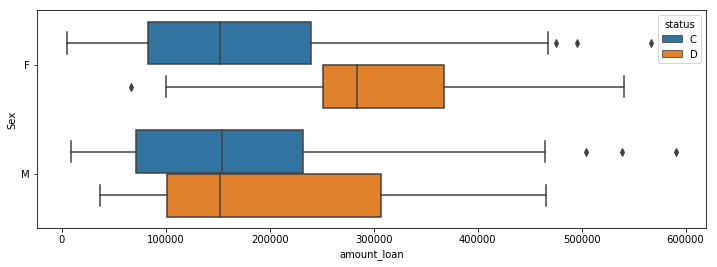

In [27]:
#plotting of graphs using seaborn library 
plt.figure(figsize=(12,4))
sns.boxplot(fdfdemoCD['amount_loan'],fdfdemoCD['Sex'],data=fdfdemoCD,orient='h',hue='status')

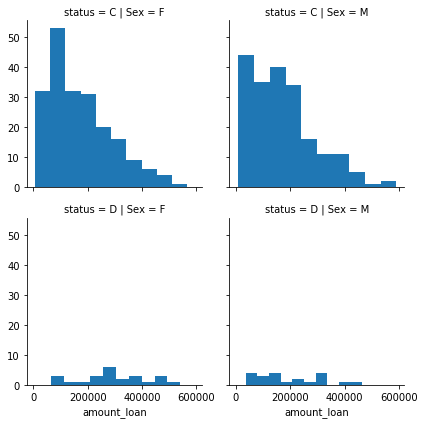

In [30]:
g=sns.FacetGrid(data=fdfdemoCD,row='status',col='Sex',palette='rainbow')
g.map(plt.hist,'amount_loan')

In [39]:
x=pd.crosstab((pd.qcut(fdfdemoCD['amount_loan'],5)),fdfdemoCD['status'])
x['Def_ratio']=x['D']/(x['C']+x['D'])
x

status,C,D,Def_ratio
amount_loan,,,
"(5147.999, 69139.2]",86,4,0.044444
"(69139.2, 125140.8]",83,6,0.067416
"(125140.8, 188630.4]",84,6,0.066667
"(188630.4, 282744.0]",78,11,0.123596
"(282744.0, 590820.0]",72,18,0.200000


In [40]:
y=pd.crosstab((pd.qcut(fdfdemoAB['amount_loan'],5)),fdfdemoAB['status'])
y['Def_ratio']=y['B']/(y['A']+y['B'])
y

status,A,B,Def_ratio
amount_loan,,,
"(4979.999, 38822.4]",44,3,0.063830
"(38822.4, 68707.2]",40,7,0.148936
"(68707.2, 92860.8]",42,4,0.086957
"(92860.8, 152702.4]",44,3,0.063830
"(152702.4, 464520.0]",33,14,0.297872


In [42]:
fdfdemoCD['status_con']=fdfdemoCD.status.map({'C':0,'D':1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C    403
D     45
Name: status, dtype: int64

In [59]:
transdfCD['transdate']=[pd.datetime.strptime(str(x),'%y%m%d') for x in transdfCD.date]
transdfCD['transdate']=pd.to_datetime(x)
transdfCD=pd.merge(transdfCD,fdfdemoCD[['account_id','date_loan','duration']],on='account_id',how='inner')
transdfCD.drop(['date_loan_x','date_loan_y','duration_x','duration_y'],axis=1,inplace=True)

In [66]:
transdfCD['date_loan']=[pd.datetime.strptime(str(x),'%y%m%d') for x in transdfCD.date_loan]
transdfCD['date_loan']=pd.to_datetime(transdfCD['date_loan'])
transdfCD.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,month,year,transdate,date_loan,duration
0,1076496,3678,930324,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN,3,1993,1993-03-24,1995-02-05,60
1,1076500,3678,930409,PRIJEM,VKLAD,8901.0,9701.0,NaN,NaN,NaN,4,1993,1993-03-30,1995-02-05,60
2,1076871,3678,930423,PRIJEM,VKLAD,5300.0,15001.0,NaN,NaN,NaN,4,1993,1993-04-09,1995-02-05,60
3,3449296,3678,930430,PRIJEM,NaN,16.7,15017.7,UROK,NaN,NaN,4,1993,1993-04-12,1995-02-05,60
4,1076501,3678,930509,PRIJEM,VKLAD,8901.0,23918.7,NaN,NaN,NaN,5,1993,1993-04-14,1995-02-05,60


In [70]:
transdfCD['loan_end_ate']=pd.to_datetime([(x+pd.DateOffset(months=y)) for (x,y) in zip(transdfCD.date_loan,transdfCD.duration)])
transdfCD.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,month,year,transdate,date_loan,duration,loan_end_ate
0,1076496,3678,930324,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN,3,1993,1993-03-24,1995-02-05,60,2000-02-05
1,1076500,3678,930409,PRIJEM,VKLAD,8901.0,9701.0,NaN,NaN,NaN,4,1993,1993-03-30,1995-02-05,60,2000-02-05
2,1076871,3678,930423,PRIJEM,VKLAD,5300.0,15001.0,NaN,NaN,NaN,4,1993,1993-04-09,1995-02-05,60,2000-02-05
3,3449296,3678,930430,PRIJEM,NaN,16.7,15017.7,UROK,NaN,NaN,4,1993,1993-04-12,1995-02-05,60,2000-02-05
4,1076501,3678,930509,PRIJEM,VKLAD,8901.0,23918.7,NaN,NaN,NaN,5,1993,1993-04-14,1995-02-05,60,2000-02-05


In [173]:
cd_datefilter=transdfCD[(transdfCD.transdate>=transdfCD.date_loan) & (transdfCD.transdate<=transdfCD.loan_end_ate)]
# print(cd_datefilter.account_id.nunique())
# print(transdfCD.account_id.nunique())
cd_datefilter=pd.merge(cd_datefilter,fdfdemoCD[['account_id','status_con']],on='account_id',how='inner')
cd_x1=cd_datefilter[cd_datefilter.account_id.isin(cd_datefilter.account_id.unique())]['account_id'].unique()
cd_x1_months=cd_datefilter[cd_datefilter.k_symbol=='UVER'].groupby('account_id',as_index=False).agg({'month':'count'})
cd_x1_months=pd.merge(cd_x1_months,fdfdemoCD[['account_id','status_con','duration']],how='inner',on='account_id')
cd_x1_months['difference']=(cd_x1_months['duration']-cd_x1_months['month'])
cd_x1_months.head()
# cd_x1_months[cd_x1_months['status_con']==0].sort_values(by='difference')['difference'].unique()
# cd_x1_months[(cd_x1_months['duration']==60) & cd_x1_months['status_con']==1]


# totalcdacc=fdfdemoCD.account_id.unique()
# len(set(totalcdacc).difference(cd_x1))

,account_id,month,status_con,duration,difference
0,37,1,1,60,59
1,38,8,0,48,40
2,110,16,0,36,20
3,226,6,0,12,6
4,276,1,0,36,35


In [238]:
# famt_loanCD=pd.qcut(fdfdemoCDFew.amount_loan,5)
# famt_loanCD=famt_loanCD.astype(np.chararray)
# y1=famt_loanCD.astype(np.chararray)
# y1=np.where(y1.astype(np.str_)=='(5147.999, 67754.4]','0.063830',y1.astype(np.str_))
# y1=np.where(y1.astype(np.str_)=='(67754.4, 123897.6]','0.063830',y1.astype(np.str_))
# y1=np.where(y1.astype(np.str_)=='(123897.6, 188659.2]','0.063830',y1.astype(np.str_))
# y1=np.where(y1.astype(np.str_)=='(188659.2, 287808.0]','0.148936',y1.astype(np.str_))
# y1=np.where(y1.astype(np.str_)=='(287808.0, 590820.0]','0.297872',y1.astype(np.str_))
#to check we will use pd.value_counts
# pd.value_counts(y1)
##x=np.where(x.astype(np.str_)=='(4979.999, 38822.4]','0.063830',x.astype(np.str_))
# x=np.where(x.astype(np.str_)=='(38822.4, 68707.2]','0.148936',x.astype(np.str_))
# x=np.where(x.astype(np.str_)=='(68707.2, 92860.8]','0.086957',x.astype(np.str_))
# x=np.where(x.astype(np.str_)=='(92860.8, 152702.4]','0.063830',x.astype(np.str_))
# x=np.where(x.astype(np.str_)=='(152702.4, 464520.0]','0.297872',x.astype(np.str_))
# pd.value_counts(x)



0.063830    232
0.297872     78
0.148936     77
dtype: int64

In [245]:
decAmount_loan=pd.crosstab(pd.qcut(fdfdemoAB.amount_loan,5),fdfdemoAB.status_con).reset_index()
decAmount_loan['Perc_1']=decAmount_loan[1]/(decAmount_loan[0]+decAmount_loan[1])
decAmount_loan

status_con,amount_loan,0,1,Perc_1
0,"(4979.999, 38822.4]",44,3,0.063830
1,"(38822.4, 68707.2]",40,7,0.148936
2,"(68707.2, 92860.8]",42,4,0.086957
3,"(92860.8, 152702.4]",44,3,0.063830
4,"(152702.4, 464520.0]",33,14,0.297872


In [429]:
# def transPerc(x):
#     for i in x.shape[0]:
#         if(x[i]<=4979.999):
#             x[i]=0.063830,
#         elif((x[i]>4979.999) & x[i]<=)  
# fdfdemoCDFew.loc[(fdfdemoCDFew['amount_loan']>4979.999) & (fdfdemoCDFew['amount_loan']<=38822.4)]['amount_loan']=0.063830
y1=fdfdemoCD['amount_loan']
y1=np.where((y1>4979.999) & (y1<= 38822.4),0.063830,y1)
y1=np.where((y1>38822.4) & (y1<= 68707.2),0.148936,y1)
y1=np.where((y1>68707.2) & (y1<= 152702.4),0.086957,y1)
y1=np.where((y1>92860.8) & (y1<= 92860.8),0.063830,y1)
y1=np.where((y1>152702.4) & (y1<= 464520.0),0.297872,y1)
y1=np.where((y1>464520.0),0.297872,y1)
pd.Series(y1).value_counts()



0.297872    233
0.086957    126
0.148936     55
0.063830     34
dtype: int64

In [260]:

DecSal=pd.crosstab(pd.qcut(fdfdemoAB.Avg_Salary,4),fdfdemoAB.status_con).reset_index()
DecSal['Perc']=DecSal[1]/(DecSal[0]+DecSal[1])
(DecSal)

status_con,Avg_Salary,0,1,Perc
0,"(8109.999, 8598.0]",55,6,0.098361
1,"(8598.0, 8994.0]",50,9,0.152542
2,"(8994.0, 10013.75]",45,10,0.181818
3,"(10013.75, 12541.0]",53,6,0.101695


In [430]:
## average salry CD feature 
y2=fdfdemoCD['Avg_Salary']
y2=np.where((y2>8109.999) & (y2<= 8598.0),0.063830,y2)
y2=np.where((y2>8598.0) & (y2<= 8994.0),0.152542,y2)
y2=np.where((y2>8994.0) & (y2<= 10013.75),0.181818,y2)
y2=np.where((y2>10013.75) & (y2<= 12541.0),0.101695,y2)
y2=np.where((y2>12541.0),0.101695,y2)
pd.Series(y2).value_counts()

0.063830    157
0.181818    104
0.101695     96
0.152542     91
dtype: int64

In [264]:
CT_Duration=pd.crosstab(fdfdemoAB.duration,fdfdemoAB.status_con).reset_index()
CT_Duration['_Perc']=CT_Duration[1]/(CT_Duration[0]+CT_Duration[1])
CT_Duration

status_con,duration,0,1,_Perc
0,12,93,10,0.097087
1,24,64,11,0.146667
2,36,32,7,0.179487
3,48,11,2,0.153846
4,60,3,1,0.250000


In [431]:
#feture prep for duration column
y3=fdfdemoCD['duration']
y3=np.where(y3==12,0.097087,y3)
y3=np.where(y3==24,0.146667,y3)
y3=np.where(y3==36,0.179487,y3)
y3=np.where(y3==48,0.153846,y3)
y3=np.where(y3==60,0.250000,y3)
pd.Series(y3).value_counts()
# fmcheckfinCD=pd.DataFrame({'amt_loan':y1,'avg_sal':y2,'duration':y3,'account_id':fdfdemoCDFew.account_id,'status':fdfdemoCDFew.status_con}).sort_values(by='account_id')

0.250000    141
0.153846    125
0.179487     91
0.146667     63
0.097087     28
dtype: int64

In [359]:
fmcheckfinCD=pd.merge(fmcheckfinCD,cd_x1_months[['account_id','difference']],on='account_id',how='inner')

In [244]:
#feature for Cd status average salary 
# fdecsalCD=pd.qcut(fdfdemoCD.Avg_Salary,4).astype(np.chararray)
# y2=np.where(fdecsalCD.astype(np.str_)=='(8109.999, 8510.75]',0.101695,fdecsalCD.astype(np.str_))
# y2=np.where(fdecsalCD.astype(np.str_)=='(8526.5, 8965.0]',0.181818,y2)
# y2=np.where(fdecsalCD.astype(np.str_)=='(8965.0, 9897.0]',0.098361,y2)
# y2=np.where(fdecsalCD.astype(np.str_)=='(9897.0, 12541.0]',0.152542,y2)
# pd.Series(y2).unique()
# pd.value_counts(pd.Series(y2))
#from train data
DecSal=pd.crosstab(pd.qcut(fdfdemoAB.Avg_Salary,4),fdfdemoAB.status_con).reset_index()
DecSal['Perc']=DecSal[1]/(DecSal[0]+DecSal[1])
DecSal
# fdecsal=pd.qcut(fdfdemoAB.Avg_Salary,4).astype(np.chararray)
# x2=np.where(fdecsal.astype(np.str_)=='(10013.75, 12541.0]',0.101695,fdecsal.astype(np.str_))
# x2=np.where(fdecsal.astype(np.str_)=='(8994.0, 10013.75]',0.181818,x2)
# x2=np.where(fdecsal.astype(np.str_)=='(8109.999, 8598.0]',0.098361,x2)
# x2=np.where(fdecsal.astype(np.str_)=='(8598.0, 8994.0]',0.152542,x2)
# pd.Series(x2).unique()
# pd.value_counts(pd.Series(x2))


status_con,Avg_Salary,0,1,Perc
0,"(8109.999, 8598.0]",55,6,0.098361
1,"(8598.0, 8994.0]",50,9,0.152542
2,"(8994.0, 10013.75]",45,10,0.181818
3,"(10013.75, 12541.0]",53,6,0.101695


In [356]:
#feature for cd status dur diff
fmcheckfinCD=pd.merge(fmcheckfinCD,cd_x1_months[['account_id','difference']],on='account_id',how='inner')
# pd.DataFrame({'amt_loan':y1,'avg_sal':y2,'dur':y3,'account_id':})

In [333]:
#feture for amount_orders column
CTAmount_orders=pd.crosstab(pd.qcut(fdfdemoAB.amount_orders,4),fdfdemoAB.status_con)
CTAmount_orders['Perc_Default']=CTAmount_orders[1]/(CTAmount_orders[0]+CTAmount_orders[1])
CTAmount_orders
# famtord=pd.qcut(fdfdemoAB.amount_orders,4).astype(np.chararray)
# famtord.astype(np.str_).unique()
# x3=np.where(famtord.astype(np.str_)=='(2583.875, 4099.55]',0.051724,famtord.astype(np.str_))
# x3=np.where(famtord.astype(np.str_)=='(6337.775, 9736.0]',0.237288,x3)
# x3=np.where(famtord.astype(np.str_)=='(4099.55, 6337.775]',0.137931,x3)
# x3=np.where(famtord.astype(np.str_)=='(318.999, 2583.875]',0.101695,x3)
# pd.Series(x3).unique()
# pd.value_counts(pd.Series(x3))

status_con,0,1,Perc_Default
amount_orders,,,
"(318.999, 2583.875]",53,6,0.101695
"(2583.875, 4099.55]",55,3,0.051724
"(4099.55, 6337.775]",50,8,0.137931
"(6337.775, 9736.0]",45,14,0.237288


In [434]:
y4=fdfdemoCD['amount_orders']
y4=np.where((y4.astype(np.float64)==304.000000),0.101695,y4)
y4=np.where((y4.astype(np.float64)==312.000000),0.101695,y4)
y4=np.where(((y4.astype(np.float64)==9847.000000) | (y4.astype(np.float64)==9910.000000)),0.237288,y4)
y4=np.where(((y4>318.999) & (y4<=2583.875)),0.101695,y4)
y4=np.where(((y4>2583.875) & (y4<=4099.55)),0.051724,y4)
y4=np.where(((y4>4099.55) & (y4<=6337.775)),0.137931,y4)
y4=np.where(((y4>6337.775) & (y4<=9736.0)),0.237288,y4)
# y3=np.where((y3>) & (y3<=),,y3)
pd.Series(y4).value_counts()

0.101695    129
0.137931    126
0.051724    112
0.237288     81
dtype: int64

In [440]:
fdfdemoAB['ratio_emi_sal']=fdfdemoAB['payments']/fdfdemoAB['Avg_Salary']
# fdfdemoAB[['ratio_emi_sal','status_con']]
femi=pd.crosstab(pd.qcut(fdfdemoAB.ratio_emi_sal,4),fdfdemoAB.status_con)
femi['1_Perc']=femi[1]/(femi[0]+femi[1])
femi
# emifeat=pd.qcut(fdfdemoAB[['account_id','ratio_emi_sal']].sort_values(by='account_id')['ratio_emi_sal'],4).astype(np.chararray)
# emifeat.head()
# x9=np.where(emifeat.astype(np.str_)=='(0.0342, 0.268]',0.033898,emifeat.astype(np.str_))
# x9=np.where(emifeat.astype(np.str_)=='(0.268, 0.438]',0.120690,x9)
# x9=np.where(emifeat.astype(np.str_)=='(0.438, 0.659]',0.224138,x9)
# x9=np.where(emifeat.astype(np.str_)=='(0.659, 1.069]',0.152542,x9)
# x9=pd.Series(x9)
y5=fdfdemoCDFew['ratio_emi_sal']=fdfdemoCDFew['payments']/fdfdemoCDFew['Avg_Salary']



NameError: name 'fdfdemoCDFew' is not defined

In [441]:
fdfdemoCD[['account_id','amount_orders']].head()

,account_id,amount_orders
3,854,1817.0
4,1869,1054.0
5,1876,8710.0
6,1906,1872.8
9,2143,1985.0


In [444]:
fmcheckfinCD.head()

,account_id,amt_loan,amt_orders,avg_sal,duration,ration_emi_sal,status
102,37,0.297872,0.137931,0.063830,0.250000,0.224138,1
107,38,0.086957,0.101695,0.063830,0.153846,0.120690,0
157,110,0.297872,0.137931,0.181818,0.179487,0.224138,0
181,226,0.086957,0.237288,0.101695,0.097087,0.152542,0
206,276,0.297872,0.137931,0.152542,0.179487,0.224138,0


In [438]:
fdfdemoCD['ratio_emi_sal']=fdfdemoCD['payments']/fdfdemoCD['Avg_Salary']
y5=fdfdemoCD['ratio_emi_sal']
y5=np.where((y5<0.034),0.033898,y5)
y5=np.where(((y5>0.0342) & (y5<=0.268)),0.033898,y5)
y5=y5=np.where(((y5>0.268) & (y5<=0.438)),0.120690,y5)
y5=y5=np.where(((y5>0.438) & (y5<=0.659)),0.224138,y5)
y5=y5=np.where(((y5>0.659) & (y5<=1.069)),0.152542,y5)
y5=y5=np.where((y5>1.069),0.152542,y5)
pd.Series(y5).value_counts()

0.224138    125
0.120690    123
0.033898    121
0.152542     79
dtype: int64

In [445]:
fmcheckfinCDNew=pd.DataFrame({'amt_loan':y1,'avg_sal':y2,'duration':y3,'amt_orders':y4,'ration_emi_sal':y5,'account_id':fdfdemoCD.account_id,'status':fdfdemoCD.status_con}).sort_values(by='account_id')
# fmcheckfinCD.rename(columns={'amt_orders':'amt_ord',
#                             'duration':'dur',
#                             'difference':'diff'},inplace=True)

In [44]:
mix5.head()
# mix5[['loan_endate','date']].min(axis=1).head()
mix5.dtypes


account_id              int64
date_loan      datetime64[ns]
duration                int64
trans_id                int64
date           datetime64[ns]
type                   object
operation              object
amount                float64
balance               float64
k_symbol               object
bank                   object
account               float64
month                   int64
year                    int64
loan_endate    datetime64[ns]
dtype: object

In [23]:
#another feature creation starts here 
lastdatetrans=mix5[['account_id','date']].sort_values(by=['account_id','date'],ascending=False)
lastdatetrans.head()
acids=lastdatetrans.account_id.unique()

In [24]:
lastdate=[]
def lasttransdate():
    for i in np.arange(0,234,1):
          yy=lastdatetrans[lastdatetrans.account_id==acids[i]]['date'].reset_index().drop('index',axis=1).iloc[0]['date']
#         acids[i]
#           yy=lastdatetrans[lastdatetrans.account_id==acids[i]][['account_id','date']][:1]
          lastdate.append(yy)
#         ldate=ldate.append(pd.DataFrame(data=yy))
#         lastdate['trans']

In [25]:
lasttransdate()

In [38]:
tomerge=pd.DataFrame({'account_id':lastdatetrans.account_id.unique(),
              'ltd':lastdate})
tomerge.head()

,account_id,ltd
0,11362,1998-12-31
1,11359,1998-12-31
2,11265,1998-12-31
3,11231,1998-12-31
4,11141,1998-12-31


In [79]:
# transwithdate_last=pd.merge(mix5,tomerge,on='account_id',how='inner')
#dup is for getting decreasing order of account ids for list comprehension
fdfdemoAB_dup=fdfdemoAB.sort_values(by='account_id',ascending=False)
fdfdemoAB_dup.head()

,client_id,disp_id,account_id,type,district_id_client,birth_number,district_id_Account,frequency,date_account,loan_id,...,Avg_Salary,Unemp_rate_1995,unemp_rate_1996,No_Entrepreneur_per_1000,No_crimes_in_1995,No_crimes_in_1996,Sex,status_con,ACLOANGAP,ratio_emi_sal
561,13971,13663,11362,OWNER,67,626019,67,POPLATEK MESICNE,1995-10-14,7308,...,8110,5.77,6.55,109,3244,3079,F,0,440 days,0.664858
656,13968,13660,11359,OWNER,61,680413,61,POPLATEK MESICNE,1994-10-01,7305,...,8814,4.76,5.74,107,2112,2059,M,0,675 days,0.510778
240,13845,13537,11265,OWNER,15,730216,15,POPLATEK MESICNE,1993-01-14,7284,...,9045,3.13,3.60,124,1845,1879,M,0,244 days,0.486346
77,13803,13495,11231,OWNER,1,471114,1,POPLATEK MESICNE,1997-02-05,7277,...,12541,0.29,0.43,167,85677,99107,M,0,261 days,0.593254
76,13694,13386,11141,OWNER,1,765120,1,POPLATEK TYDNE,1997-02-11,7264,...,12541,0.29,0.43,167,85677,99107,F,0,238 days,0.298621


In [85]:
tomerge['loan_end_date']=pd.to_datetime([(x+pd.DateOffset(months=y)) for (x,y) in zip(fdfdemoAB_dup.date_loan,fdfdemoAB_dup.duration)])
# fdfdemoAB[['date_loan','duration']].shape

,account_id,ltd,loan_end_date,minimumofdates


In [86]:
tomerge['minimumofdates']=tomerge[['ltd','loan_end_date']].min(axis=1)
tomerge[tomerge.account_id==2]

,account_id,ltd,loan_end_date,minimumofdates
233,2,1998-12-31,1996-01-05,1996-01-05


In [89]:
mix5_min_ltd=pd.merge(mix5,tomerge[['account_id','minimumofdates','ltd']],on='account_id',how='inner')

In [102]:
mix5_min_ltd.head()
todo1=mix5_min_ltd[(mix5_min_ltd.date>=mix5_min_ltd.date_loan) & (mix5_min_ltd.date<=mix5_min_ltd.minimumofdates)]
###this contains the no of transaction loan months between loan start and min(lasttrans,loanenddate)
todo1[todo1.k_symbol=='UVER'].groupby(['account_id']).size()

account_id
2        24
19        8
25       12
67       24
97       12
132      12
173      12
176      12
290      48
347      22
544      24
666      12
718      12
790      41
813      12
816      24
825      12
846      24
1012     21
1106     20
1166     48
1256     36
1329     12
1375     24
1527     32
1603     12
1762     36
1787      4
1801     36
1843     36
         ..
10105    24
10131    20
10266    22
10320    60
10361    12
10364    36
10411    23
10439    24
10630    24
10663    36
10738    36
10788    12
10789    12
10807    12
10911    36
10940    36
10973    48
11013    60
11021    22
11042    36
11065    49
11079    12
11111    36
11135    36
11138    24
11141    12
11231    12
11265    12
11359    12
11362    24
Length: 234, dtype: int64

In [114]:
tomerge=pd.merge(tomerge,fdfdemoAB[['account_id','duration','date_loan','status']],on='account_id',how='inner')

,account_id,ltd,loan_end_date,minimumofdates,duration,date_loan,status
0,11362,1998-12-31,1998-12-27,1998-12-27,24,1996-12-27,A
1,11359,1998-12-31,1997-08-06,1997-08-06,12,1996-08-06,A
2,11265,1998-12-31,1994-09-15,1994-09-15,12,1993-09-15,A
3,11231,1998-12-31,1998-10-24,1998-10-24,12,1997-10-24,A
4,11141,1998-12-31,1998-10-07,1998-10-07,12,1997-10-07,A


In [117]:
tomerge['diff_lst_loanstartdate']=(tomerge.minimumofdates-tomerge.date_loan)/np.timedelta64(1,'M')

In [126]:
tomerge=pd.merge(tomerge,todo1[todo1.k_symbol=='UVER'].groupby(['account_id']).size().reset_index(),on='account_id',how='inner')
tomerge.rename(columns={0:'No_loanpayments_lst_loanstart'},inplace=True)

In [139]:
tomerge['rounded_diff_lst_loanstartdate']=(np.round(tomerge.diff_lst_loanstartdate))

In [143]:

tomerge['diff_lst']=tomerge['rounded_diff_lst_loanstartdate']-tomerge['No_loanpayments_lst_loanstart']


In [148]:
fmcheckfin=pd.merge(fmcheckfin,tomerge[['account_id','diff_lst']],on='account_id',how='inner')

In [461]:
tomerge.head()
tomerge[tomerge.diff_lst<0]

,account_id,ltd,loan_end_date,minimumofdates,duration,date_loan,status,diff_lst_loanstartdate,No_loanpayments_lst_loanstart,rounded_diff_lst_loanstartdate,diff_lst
9,11065,1998-12-31,1998-06-12,1998-06-12,48,1994-06-12,A,48.000986,49,48.0,-1.0
41,9583,1998-12-31,1997-12-12,1997-12-12,24,1995-12-12,A,24.016920,25,24.0,-1.0
57,8982,1998-12-31,1997-10-12,1997-10-12,36,1994-10-12,A,36.008953,37,36.0,-1.0


65721     3331600
73365     3331601
80847     3331602
88532     3331603
96472     3331604
104700    3331605
113555    3331606
125576    3331607
138444    3331608
147302    3331609
156699    3331610
166364    3331611
176711    3331612
187395    3331613
197938    3331614
208828    3331615
219972    3331616
231554    3331617
244061    3331618
260715    3331619
278750    3331620
291472    3331621
304940    3331622
318851    3331623
333821    3331624
349452    3331625
365275    3331626
381828    3331627
398882    3331628
416651    3331629
435840    3331630
461863    3331631
489637    3331632
509136    3331633
529838    3331634
550986    3331635
573640    3331636
596846    3331637
619471    3331638
642591    3331639
666131    3331640
690208    3331641
715924    3331642
750066    3331643
785678    3331644
810053    3331645
835372    3331646
860806    3331647
887305    3331648
Name: trans_id, dtype: int64

In [157]:
#now preparing the same feature for CD customers data 
transdfCD.shape

transdf.shape[0]+transdfCD.shape[0]

191556

In [327]:
transdfCD['date'].head()

0    930324
1    930409
2    930423
3    930430
4    930509
Name: date, dtype: int64

In [330]:
wrong_t=[pd.datetime.strptime(str(x),'%y%m%d') for x in transdfCD.date]
transdfCD['transdate']=pd.to_datetime(wrong_t)
transdfCD.head(20)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,month,year,transdate,date_loan,duration,loan_end_ate
0,1076496,3678,930324,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN,3,1993,1993-03-24,1995-02-05,60,2000-02-05
1,1076500,3678,930409,PRIJEM,VKLAD,8901.0,9701.0,NaN,NaN,NaN,4,1993,1993-04-09,1995-02-05,60,2000-02-05
2,1076871,3678,930423,PRIJEM,VKLAD,5300.0,15001.0,NaN,NaN,NaN,4,1993,1993-04-23,1995-02-05,60,2000-02-05
3,3449296,3678,930430,PRIJEM,NaN,16.7,15017.7,UROK,NaN,NaN,4,1993,1993-04-30,1995-02-05,60,2000-02-05
4,1076501,3678,930509,PRIJEM,VKLAD,8901.0,23918.7,NaN,NaN,NaN,5,1993,1993-05-09,1995-02-05,60,2000-02-05
5,3449297,3678,930531,PRIJEM,NaN,62.5,23981.2,UROK,NaN,NaN,5,1993,1993-05-31,1995-02-05,60,2000-02-05
6,1076502,3678,930609,PRIJEM,VKLAD,13352.0,37333.2,NaN,NaN,NaN,6,1993,1993-06-09,1995-02-05,60,2000-02-05
7,1076872,3678,930622,VYDAJ,VYBER,6700.0,30633.2,NaN,NaN,NaN,6,1993,1993-06-22,1995-02-05,60,2000-02-05
8,3449298,3678,930630,PRIJEM,NaN,82.0,30715.2,UROK,NaN,NaN,6,1993,1993-06-30,1995-02-05,60,2000-02-05
9,1076503,3678,930709,PRIJEM,VKLAD,8901.0,39616.2,NaN,NaN,NaN,7,1993,1993-07-09,1995-02-05,60,2000-02-05


In [352]:
transdfCD.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,month,year,transdate,date_loan,duration,loan_end_ate
0,1076496,3678,930324,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN,3,1993,1993-03-24,1995-02-05,60,2000-02-05
1,1076500,3678,930409,PRIJEM,VKLAD,8901.0,9701.0,NaN,NaN,NaN,4,1993,1993-04-09,1995-02-05,60,2000-02-05
2,1076871,3678,930423,PRIJEM,VKLAD,5300.0,15001.0,NaN,NaN,NaN,4,1993,1993-04-23,1995-02-05,60,2000-02-05
3,3449296,3678,930430,PRIJEM,NaN,16.7,15017.7,UROK,NaN,NaN,4,1993,1993-04-30,1995-02-05,60,2000-02-05
4,1076501,3678,930509,PRIJEM,VKLAD,8901.0,23918.7,NaN,NaN,NaN,5,1993,1993-05-09,1995-02-05,60,2000-02-05


In [373]:
transdfCD.head()
#ascending order
lasttransdateCD=transdfCD[['account_id','transdate']].sort_values(by=['account_id','transdate'],ascending=False)
lasttransdateCD.head(20)
transdfCD[transdfCD.account_id==10812].sort_values(by='transdate',ascending=False)

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,month,year,transdate,date_loan,duration,loan_end_ate
91971,3254890,10812,981212,VYDAJ,PREVOD NA UCET,2931.0,7610.9,UVER,IJ,5287313.0,12,1998,1998-12-12,1998-05-29,48,2002-05-29
91970,3524697,10812,981130,PRIJEM,NaN,55.0,10556.5,UROK,NaN,NaN,11,1998,1998-11-30,1998-05-29,48,2002-05-29
91969,3254958,10812,981130,VYDAJ,VYBER,14.6,10541.9,SLUZBY,NaN,NaN,11,1998,1998-11-30,1998-05-29,48,2002-05-29
91968,3254889,10812,981112,VYDAJ,PREVOD NA UCET,2931.0,10501.5,UVER,IJ,5287313.0,11,1998,1998-11-12,1998-05-29,48,2002-05-29
91967,3524696,10812,981031,PRIJEM,NaN,50.5,13447.1,UROK,NaN,NaN,10,1998,1998-10-31,1998-05-29,48,2002-05-29
91966,3254957,10812,981031,VYDAJ,VYBER,14.6,13432.5,SLUZBY,NaN,NaN,10,1998,1998-10-31,1998-05-29,48,2002-05-29
91965,3254978,10812,981030,VYDAJ,VYBER,1900.0,13396.6,NaN,NaN,NaN,10,1998,1998-10-30,1998-05-29,48,2002-05-29
91964,3254861,10812,981019,PRIJEM,VKLAD,7974.0,15296.6,NaN,NaN,NaN,10,1998,1998-10-19,1998-05-29,48,2002-05-29
91963,3254888,10812,981012,VYDAJ,PREVOD NA UCET,2931.0,7322.6,UVER,IJ,5287313.0,10,1998,1998-10-12,1998-05-29,48,2002-05-29
91962,3524695,10812,980930,PRIJEM,NaN,53.9,10268.2,UROK,NaN,NaN,9,1998,1998-09-30,1998-05-29,48,2002-05-29


In [362]:
cdaccids=lasttransdateCD['account_id'].unique()
cdaccids[:5]

array([11349, 11328, 11327, 11317, 11271], dtype=int64)

In [357]:
# feature preparation for CD dat 
lastdateCD=[]
def funclasttransdateCD():
    for j in np.arange(0,cdaccids.shape[0],1):
          zz=lasttransdateCD[lasttransdateCD.account_id==cdaccids[j]]['transdate'].reset_index().drop('index',axis=1).iloc[0]['transdate']
          lastdateCD.append(zz)
#        

In [358]:
# lasttransdateCD[lasttransdateCD.account_id==11349]['transdate'].reset_index().drop('index',axis=1).iloc[0]['transdate']
funclasttransdateCD()

In [359]:
lastdateCD

[Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-12 00:00:00'),
 Timestamp('1998-12-12 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-31 00:00:00'),
 Timestamp('1998-12-

In [382]:
dfaccid_lstdate=pd.DataFrame({'account_id':cdaccids,'last_trans_date':lastdateCD})
# wrongdf=dfaccid_lstdate

In [374]:
dfaccid_lstdate.head(5)


,account_id,last_trans_date
0,11349,1998-12-31
1,11328,1998-12-31
2,11327,1998-12-31
3,11317,1998-12-31
4,11271,1998-12-31


In [271]:
dtl=[pd.datetime.strptime(str(x),'%y%m%d') for x in fdfdemoCD.date_loan]
fdfdemoCD['date_loan']=pd.to_datetime(dtl)


ValueError: unconverted data remains: -05-30 00:00:00

In [376]:
# fdfdemoCD['loan_end_date']=pd.to_datetime([(x+pd.DateOffset(months=y)) for (x,y) in zip(fdfdemoCD.date_loan,fdfdemoCD.duration)])
fdfdemoCD[['date_loan','duration','loan_end_date']]

,date_loan,duration,loan_end_date
3,1995-05-30,48,1999-05-30
4,1998-01-29,36,2001-01-29
5,1998-09-10,24,2000-09-10
6,1997-10-08,24,1999-10-08
9,1996-09-09,36,1999-09-09
10,1997-02-05,60,2002-02-05
11,1996-07-18,36,1999-07-18
13,1998-02-13,48,2002-02-13
14,1998-05-21,24,2000-05-21
15,1997-05-19,60,2002-05-19


In [383]:
dfaccid_lstdate=pd.merge(dfaccid_lstdate,fdfdemoCD[['account_id','date_loan','loan_end_date','status_con','duration']],on='account_id',how='inner')
dfaccid_lstdate.head()

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration
0,11349,1998-12-31,1995-10-29,2000-10-29,0,60
1,11328,1998-12-31,1998-07-18,2003-07-18,0,60
2,11327,1998-12-31,1998-09-27,2000-09-27,0,24
3,11317,1998-12-31,1998-11-22,2003-11-22,0,60
4,11271,1998-12-31,1997-01-31,2000-01-31,0,36


In [397]:
transdt[(transdt.account_id==110) & (transdt.k_symbol=='UVER')].shape

(16, 10)

In [384]:
dfaccid_lstdate.dtypes
dfaccid_lstdate['min_ltd_led']=dfaccid_lstdate[['last_trans_date','loan_end_date']].min(axis=1)

In [385]:
dfaccid_lstdate.head()

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration,min_ltd_led
0,11349,1998-12-31,1995-10-29,2000-10-29,0,60,1998-12-31
1,11328,1998-12-31,1998-07-18,2003-07-18,0,60,1998-12-31
2,11327,1998-12-31,1998-09-27,2000-09-27,0,24,1998-12-31
3,11317,1998-12-31,1998-11-22,2003-11-22,0,60,1998-12-31
4,11271,1998-12-31,1997-01-31,2000-01-31,0,36,1998-12-31


In [386]:
todocd1=pd.merge(transdfCD,dfaccid_lstdate[['account_id','min_ltd_led']],on='account_id',how='inner')

In [387]:
todocd1_1=todocd1[(todocd1.transdate>=todocd1.date_loan) & (todocd1.transdate<=todocd1.min_ltd_led)]


In [388]:
todocd1_2=todocd1_1[todocd1_1.k_symbol=='UVER'].groupby(['account_id']).size().reset_index()


In [399]:
todocd1_2.tail()

,account_id,0
443,11271,23
444,11317,1
445,11327,3
446,11328,5
447,11349,38


In [398]:
dfaccid_lstdate=pd.merge(dfaccid_lstdate,todocd1_2,on='account_id',how='inner').rename(columns={0:'No_loanpayments_loandate_lasttrandate'})
dfaccid_lstdate.head()

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration,min_ltd_led,No_loanpayments_loandate_lasttrandate
0,11349,1998-12-31,1995-10-29,2000-10-29,0,60,1998-12-31,38
1,11328,1998-12-31,1998-07-18,2003-07-18,0,60,1998-12-31,5
2,11327,1998-12-31,1998-09-27,2000-09-27,0,24,1998-12-31,3
3,11317,1998-12-31,1998-11-22,2003-11-22,0,60,1998-12-31,1
4,11271,1998-12-31,1997-01-31,2000-01-31,0,36,1998-12-31,23


to

In [403]:
dfaccid_lstdate['diff_lst_loanstartdate']=(dfaccid_lstdate.min_ltd_led-dfaccid_lstdate.date_loan)/np.timedelta64(1,'M')
dfaccid_lstdate.head(20)

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration,min_ltd_led,No_loanpayments_loandate_lasttrandate,diff_lst_loanstartdate
0,11349,1998-12-31,1995-10-29,2000-10-29,0,60,1998-12-31,38,38.078811
1,11328,1998-12-31,1998-07-18,2003-07-18,0,60,1998-12-31,5,5.453911
2,11327,1998-12-31,1998-09-27,2000-09-27,0,24,1998-12-31,3,3.121214
3,11317,1998-12-31,1998-11-22,2003-11-22,0,60,1998-12-31,1,1.281340
4,11271,1998-12-31,1997-01-31,2000-01-31,0,36,1998-12-31,23,22.965564
5,11244,1998-12-31,1997-12-11,1999-12-11,0,24,1998-12-31,13,12.649130
6,11186,1998-12-31,1996-10-02,2001-10-02,0,60,1998-12-31,27,26.941005
7,11096,1998-12-31,1997-06-09,2002-06-09,0,60,1998-12-31,19,18.727284
8,11069,1998-12-31,1997-03-04,2001-03-04,0,48,1998-12-31,22,21.914208
9,11054,1998-12-31,1996-08-20,2001-08-20,0,60,1998-12-31,28,28.353765


In [308]:
transdfCD[transdfCD.k_symbol=='UVER'].groupby('account_id').size()

account_id
37        1
38        8
103      11
105       1
110      16
226       6
276       1
303       7
309       1
314      20
319      18
330       6
339      12
344      48
349       4
378      15
426      51
440       9
442       7
472      19
501      26
525      17
675      21
785      11
789      37
808      31
817      46
854      43
873      10
915      39
         ..
10613     4
10644     6
10645     6
10650    10
10652     8
10679    15
10711    12
10728    33
10762    27
10774     8
10799     6
10812     7
10857    11
10884    34
10905    16
10915     7
10942    38
10954    21
10963    24
11027    14
11054    28
11069    22
11096    19
11186    27
11244    13
11271    23
11317     1
11327     3
11328     5
11349    38
Length: 448, dtype: int64

In [409]:
# dfaccid_lstdate['round_diff_lst_loanstartdate']=np.round(dfaccid_lstdate.diff_lst_loanstartdate)
dfaccid_lstdate.rename(columns={'No_loanpayments_loandate_lasttrandate':'no_lpay_between',
                               'round_diff_lst_loanstartdate':'rounded'},inplace=True)


In [411]:
dfaccid_lstdate.head(1)

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration,min_ltd_led,no_lpay_between,diff_lst_loanstartdate,rounded
0,11349,1998-12-31,1995-10-29,2000-10-29,0,60,1998-12-31,38,38.078811,38.0


In [417]:
dfaccid_lstdate.head()

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration,min_ltd_led,no_lpay_between,diff_lst_loanstartdate,rounded
0,11349,1998-12-31,1995-10-29,2000-10-29,0,60,1998-12-31,38,38.078811,38.0
1,11328,1998-12-31,1998-07-18,2003-07-18,0,60,1998-12-31,5,5.453911,5.0
2,11327,1998-12-31,1998-09-27,2000-09-27,0,24,1998-12-31,3,3.121214,3.0
3,11317,1998-12-31,1998-11-22,2003-11-22,0,60,1998-12-31,1,1.281340,1.0
4,11271,1998-12-31,1997-01-31,2000-01-31,0,36,1998-12-31,23,22.965564,23.0


In [419]:
dfaccid_lstdate['diff_lst_lasttranss']=dfaccid_lstdate['rounded']-dfaccid_lstdate['no_lpay_between']

In [421]:
dfaccid_lstdate.head()

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration,min_ltd_led,no_lpay_between,diff_lst_loanstartdate,rounded,diff_lst_lasttranss
0,11349,1998-12-31,1995-10-29,2000-10-29,0,60,1998-12-31,38,38.078811,38.0,0.0
1,11328,1998-12-31,1998-07-18,2003-07-18,0,60,1998-12-31,5,5.453911,5.0,0.0
2,11327,1998-12-31,1998-09-27,2000-09-27,0,24,1998-12-31,3,3.121214,3.0,0.0
3,11317,1998-12-31,1998-11-22,2003-11-22,0,60,1998-12-31,1,1.281340,1.0,0.0
4,11271,1998-12-31,1997-01-31,2000-01-31,0,36,1998-12-31,23,22.965564,23.0,0.0


In [422]:
pd.crosstab(dfaccid_lstdate.diff_lst_lasttranss,dfaccid_lstdate.status_con)

status_con,0,1
diff_lst_lasttranss,,
-1.0,2,0
0.0,343,0
1.0,56,9
2.0,1,9
3.0,1,10
4.0,0,5
5.0,0,2
6.0,0,2
8.0,0,1


In [424]:
pd.crosstab(tomerge.diff_lst,tomerge.status)

status,A,B
diff_lst,,
-1.0,3,0
0.0,197,0
1.0,1,6
2.0,0,5
3.0,2,2
4.0,0,4
5.0,0,1
6.0,0,2
7.0,0,2


In [454]:
fmcheckfinCDNew=pd.merge(fmcheckfinCDNew,dfaccid_lstdate[['account_id','diff_lst_lasttranss']],on='account_id',how='inner')

In [451]:
dfaccid_lstdate.head()

,account_id,last_trans_date,date_loan,loan_end_date,status_con,duration,min_ltd_led,no_lpay_between,diff_lst_loanstartdate,rounded,diff_lst_lasttranss
0,11349,1998-12-31,1995-10-29,2000-10-29,0,60,1998-12-31,38,38.078811,38.0,0.0
1,11328,1998-12-31,1998-07-18,2003-07-18,0,60,1998-12-31,5,5.453911,5.0,0.0
2,11327,1998-12-31,1998-09-27,2000-09-27,0,24,1998-12-31,3,3.121214,3.0,0.0
3,11317,1998-12-31,1998-11-22,2003-11-22,0,60,1998-12-31,1,1.281340,1.0,0.0
4,11271,1998-12-31,1997-01-31,2000-01-31,0,36,1998-12-31,23,22.965564,23.0,0.0


In [29]:
#applying svm algorithm
import sklearn.model_selection as model_selection
X=fmcheckfin[['amt_loan','amt_ord','avg_sal','durdiff']]
y=fmcheckfin['status']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,amt_loan,amt_ord,avg_sal,durdiff
65,0.148936,0.137931,0.181818,0
135,0.148936,0.101695,0.181818,0
198,0.063830,0.137931,0.181818,0
138,0.297872,0.237288,0.098361,0
31,0.297872,0.137931,0.101695,0


In [28]:
fmcheckfin.head()

,account_id,amt_loan,amt_ord,avg_sal,dur,no_inhi,reg,status,diff,ratio_emi_Sal,durdiff,diff_lst
0,2,0.086957,0.051724,0.101695,0.146667,0.127273,0.09375,0,1,0.12069,0,0.0
1,19,0.063830,0.101695,0.181818,0.097087,0.186441,0.208333,1,5,0.12069,4,4.0
2,25,0.063830,0.101695,0.181818,0.097087,0.1,0.166667,0,1,0.033898,0,0.0
3,67,0.297872,0.237288,0.098361,0.146667,0.186441,0.208333,0,1,0.152542,0,0.0
4,97,0.063830,0.237288,0.101695,0.097087,0.127273,0.166667,0,1,0.152542,0,0.0


In [6]:
from sklearn.svm import SVC
modsvc=SVC()

In [30]:
modsvc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,modsvc.predict(X_test)))
print(classification_report(y_test,modsvc.predict(X_test)))

[[61  1]
 [ 0 16]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        62
          1       0.94      1.00      0.97        16

avg / total       0.99      0.99      0.99        78



In [7]:
from sklearn.model_selection import GridSearchCV
mod1svc=GridSearchCV(SVC(),param_grid={'C':[1,10,100],
                                    'gamma':[0.01,0.1,1,10]},verbose=3)

In [24]:
mod1svc.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9038461538461539, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9038461538461539, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9038461538461539, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.9038461538461539, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.9038461538461539, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.9038461538461539, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [25]:
mod1svc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,mod1svc.predict(X_test)))
print(classification_report(y_test,mod1svc.predict(X_test)))

[[62  0]
 [16  0]]
             precision    recall  f1-score   support

          0       0.79      1.00      0.89        62
          1       0.00      0.00      0.00        16

avg / total       0.63      0.79      0.70        78



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
